# PRCP-1025-FLIGHT PRICE PREDICTION

   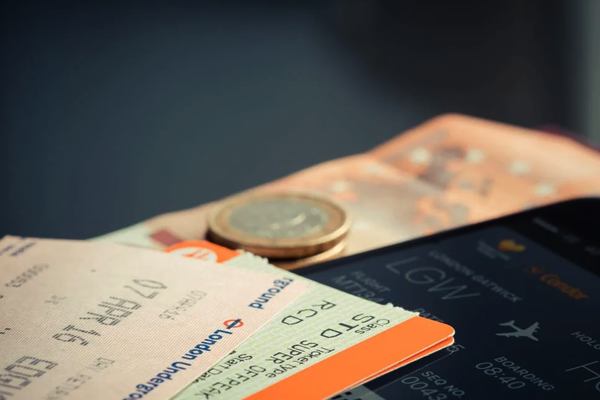

# PROBLEM STATEMENT 

* Flight ticket prices are highly unpredictable, often changing day to day, today we might see a price, check out the price of the same flight tomorrow, it will be a different story, making it challenging for travelers and airlines to forecast costs.
* The goal of this project is to build a predictive regression model that can be useful to forecast the flight fare based on various factors such as

1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India,  and many more.
2. Date_of_Journey: This column will let us know about the date on which the passenger's journey will start.
3. Source: This column holds the name of the place form where the passenger's journey will start.
4. Destination: This column holds the name of the place to where passengers wanted to travel.
5. Route: Here we can know about what the route is through which passengers have opted to travel form his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7. Duration: Duration is the whole period that a flight will take to complete its journey form source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses before onboarding.  ..

In [5]:
# Importing Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#Reading the excel files 
df = pd.read_excel('Flight_Fare.xlsx')

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.shape

(10683, 11)

In [13]:
# Finding the number of null values in the column
print("\nNull values per column:")
df.isnull().sum()


Null values per column:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
# Printing the total number of null values
Gt = df.isnull().sum().sum()
print('\nTotal number of null values:',Gt)


Total number of null values: 2


In [15]:
# statistical description

df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Insights from statistical description

1. There are 12 unqiue airline ,the most frequent arline is jet airways -> appearing 3849 times.
2. date of journey has 44 unique values, the most frequent date is 18/05/2019 -> appearing 504 times.
3. There are 5 unique source and 6 unique destinations, the most frequent route is from Delhi to cochin -> appearing 4537 times.
4. There are 128 unique routes, the most frequent/common route is DEl->BOM->COK ->apperaing 2376 times.
5. There are 222 unique departure times, with the most common being 18:55 -> appearing 233 times.
6. There are 1343 unique arrival times, with 19:00 being the most frequent-> appearing 423 times.
7. 368 unique durations, with 2h 50m being the most frequent-> appearing 550 times.
8. There are 5 unique values for total stops, the most common is 1 stop -> appearing 5625 times.
9. There are 10 unique values for additional_info , with no info being the most common -> appearing 8345 times.
10. The mean value for Price is Rs.9087.06 , min price Rs.1759 , max price Rs.79512 , median(50th percenticle) Rs.8372 : price is right skewed
11. STD is 4611.36 this implies that there is a high significant difference, because std is approximately 50% of the mean value, so the filght fare can vary highly


In [18]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [19]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [20]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [21]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [22]:
df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [23]:
# Printing the total number of value count of Airlines
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [24]:
# Total number of aurline count
df.Airline.count()

10683

In [25]:
# Printing the counts of stops 
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [26]:
# Printing the counts of total source
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [27]:
# Printing the counts of total Destination
df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [28]:
# Printing the counts of Route 
df.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [29]:
df.Arrival_Time.value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

# -------------------------EXPLORATORY DATA ANALYSIS (EDA)-----------------------
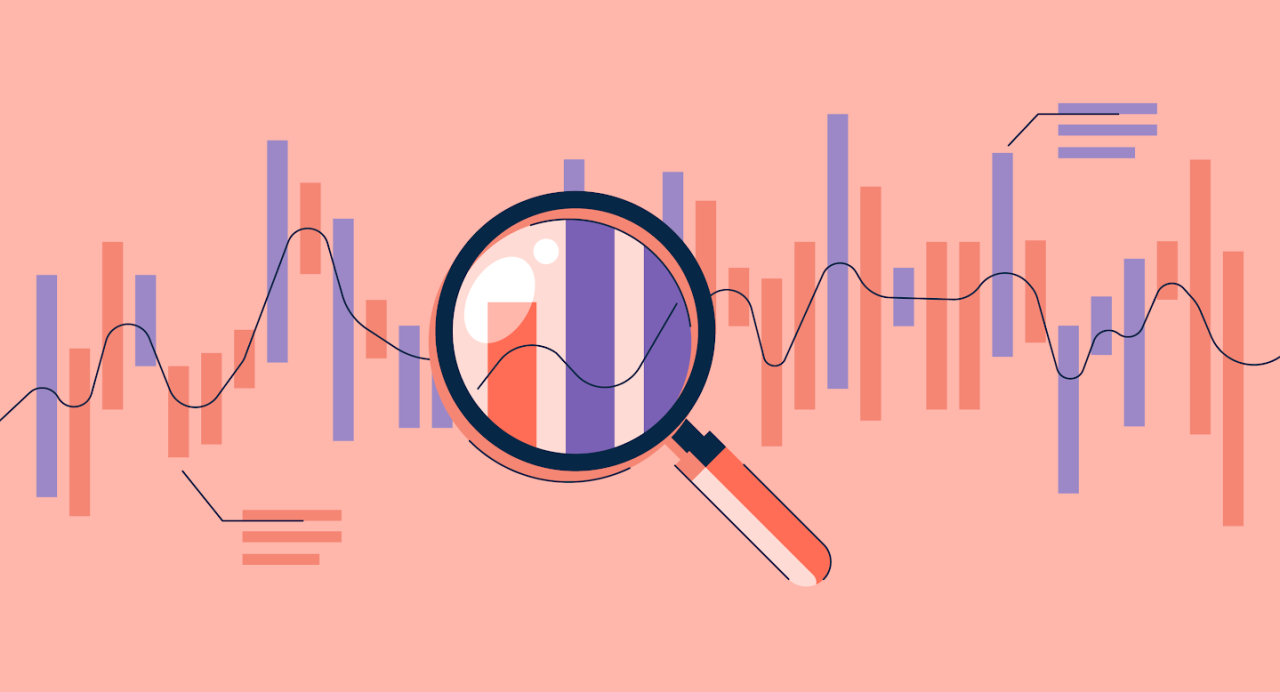

# Univariate analysis

In [32]:
# Analysing the distribution for price column
skewness = df['Price'].skew()
print(skewness)

1.8125523782189141


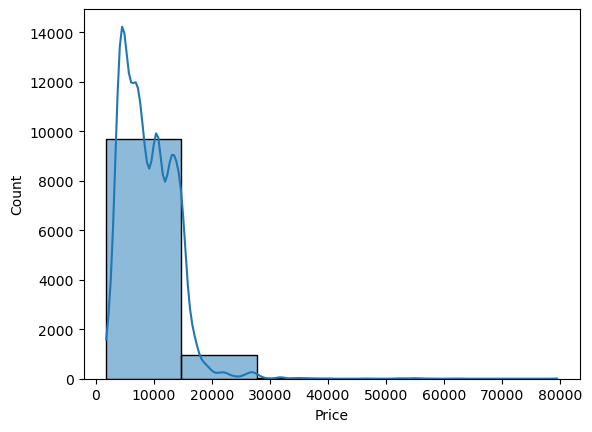

In [33]:
# Visualizes the distribution of the Price
sns.histplot(df['Price'], kde=True, bins=6)
plt.show()

### Insights 

1. Distribution of Price column -> positively right skewed.
2. Most of the flight price ranges between 1700 to 15000. 

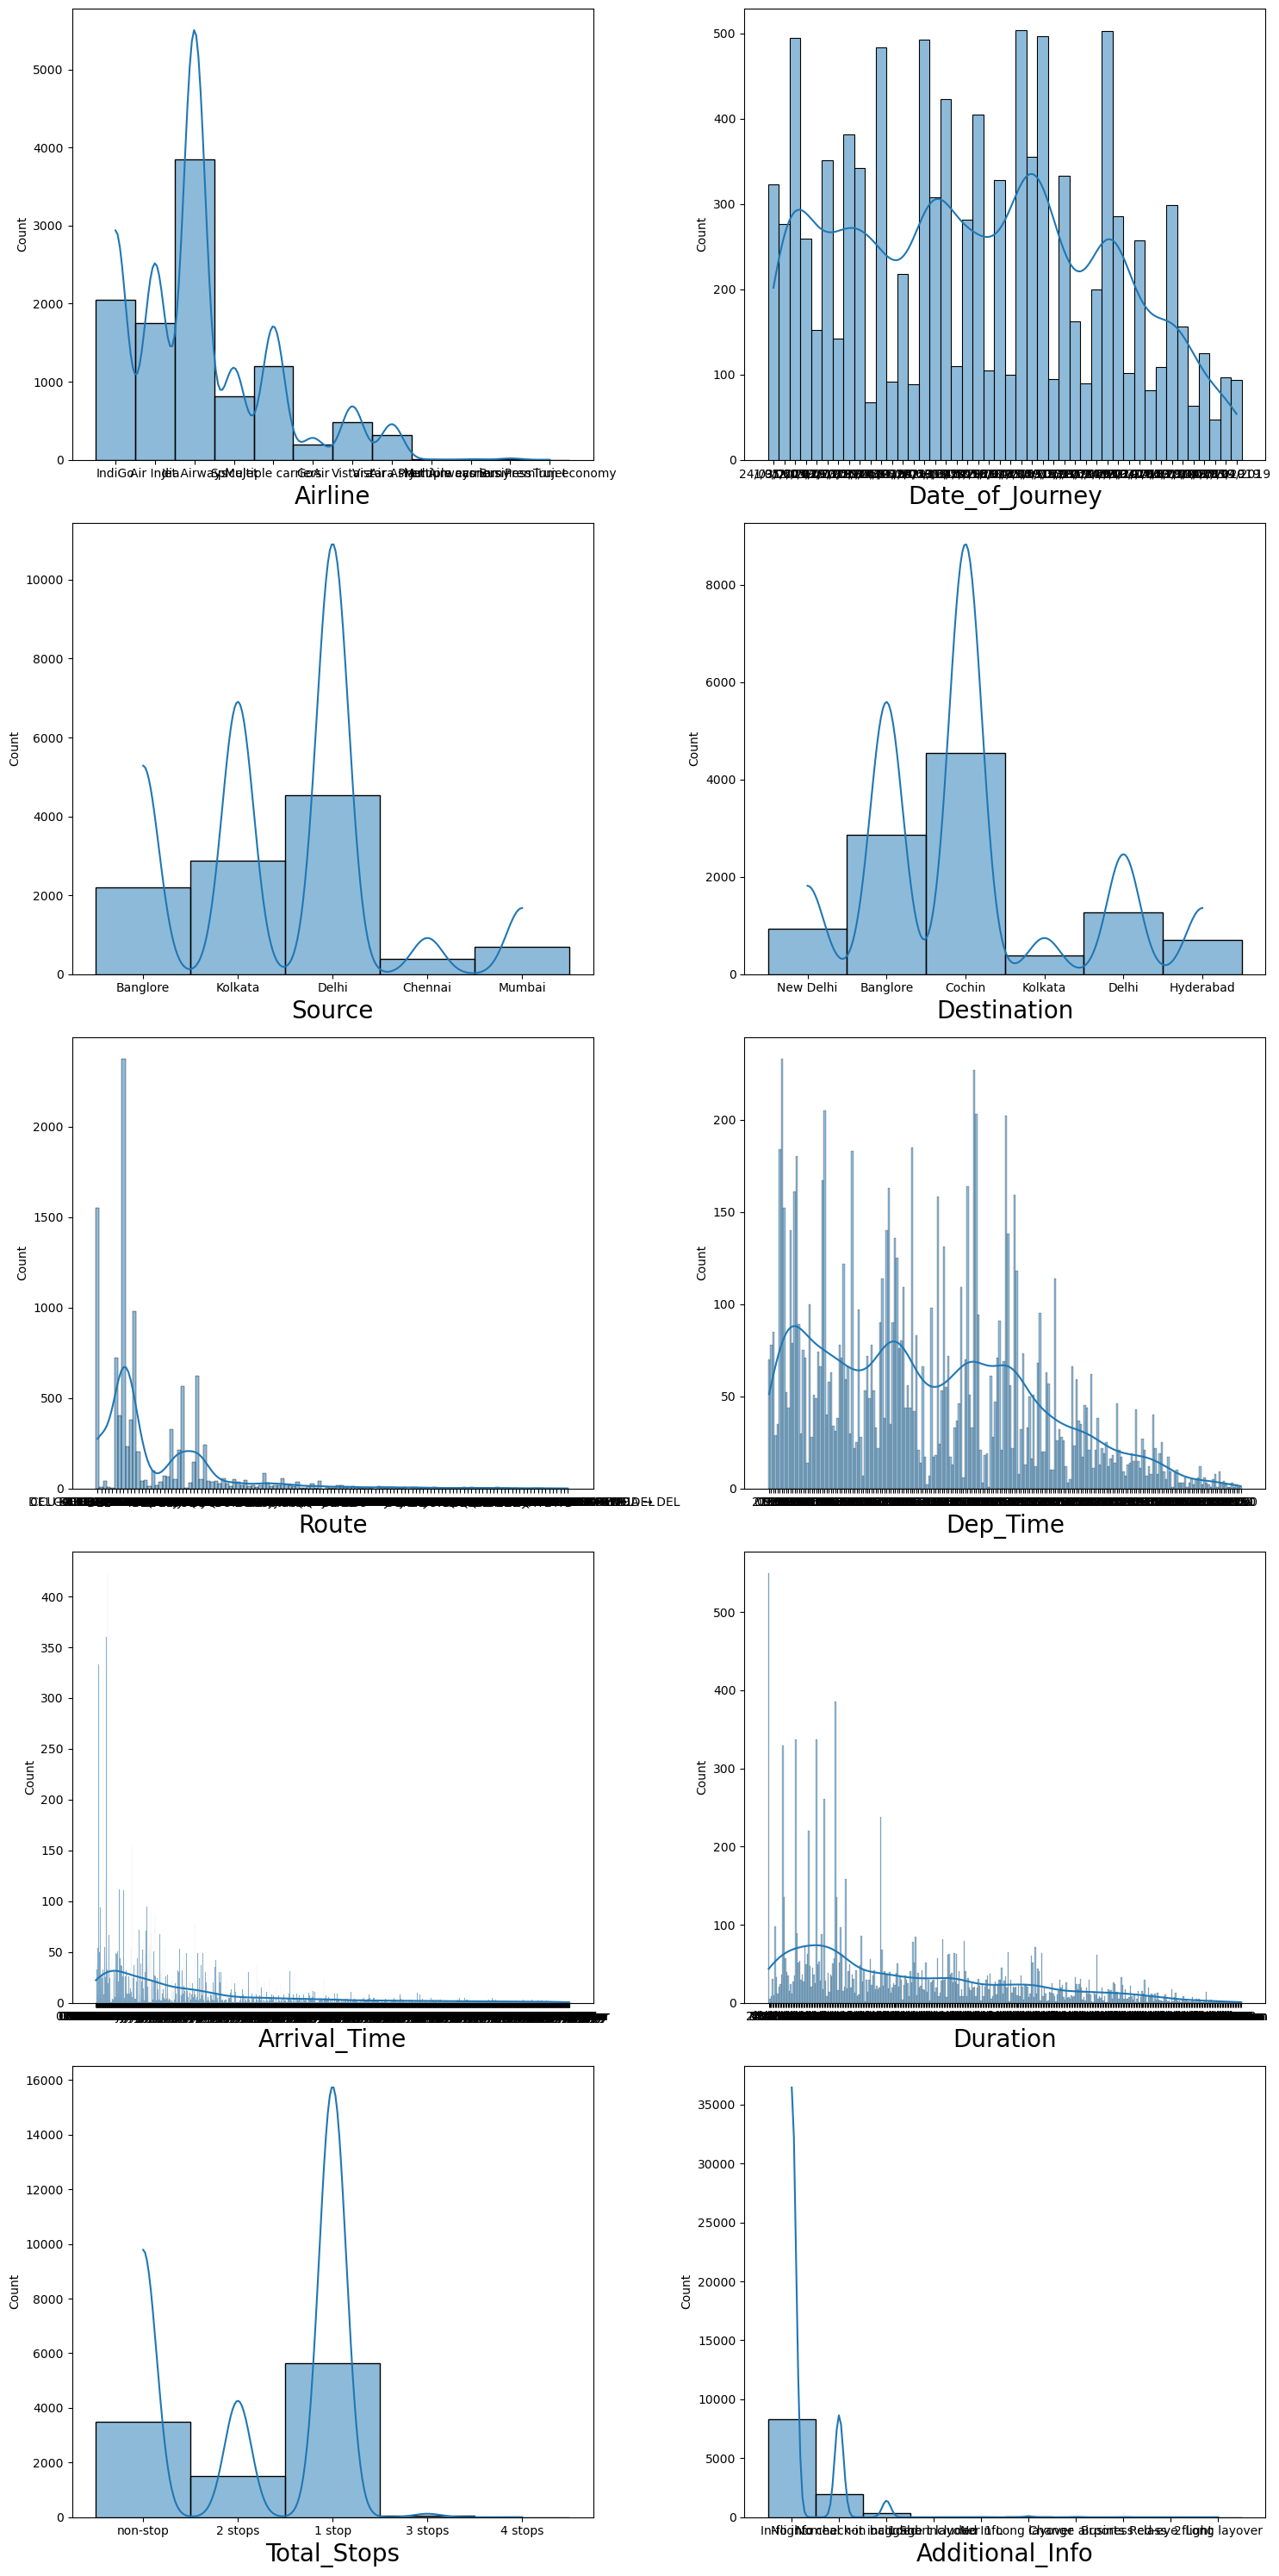

In [35]:
# Histplot to check the distribution.

plt.figure(figsize = (15,30))
plt_num = 1

for column in df.columns:
    if plt_num<=10:
        bk = plt.subplot(5, 2, plt_num)
        sns.histplot(df[column], kde = True, bins = 10)
        plt.xlabel(column, fontsize = 20)
    plt_num+=1
plt.tight_layout()

# Insights from histplot


1. Airline: Right-skewed (Most bookings concentrated on a few airlines, with a long tail for less frequent airlines).
2. Date of Journey: Skewed (Not normally distributed; counts vary widely across different dates).
3. Source: Right-skewed (Few cities like Delhi dominate, with other cities having lower counts).
4. Destination: Right-skewed (Similar to Source; destinations like Delhi and Cochin are more common).
5. Route: Right-skewed (A few routes are very frequent, with a long tail for less common routes).
6. Dep. Time: Right-skewed (More frequent departures at specific times like early mornings or evenings).
7. Arrival_time:Right-skewed
8. Duration:Right-skewed
9. Total_stops:Right-skewed
10. Additional_Info:Right-skewed

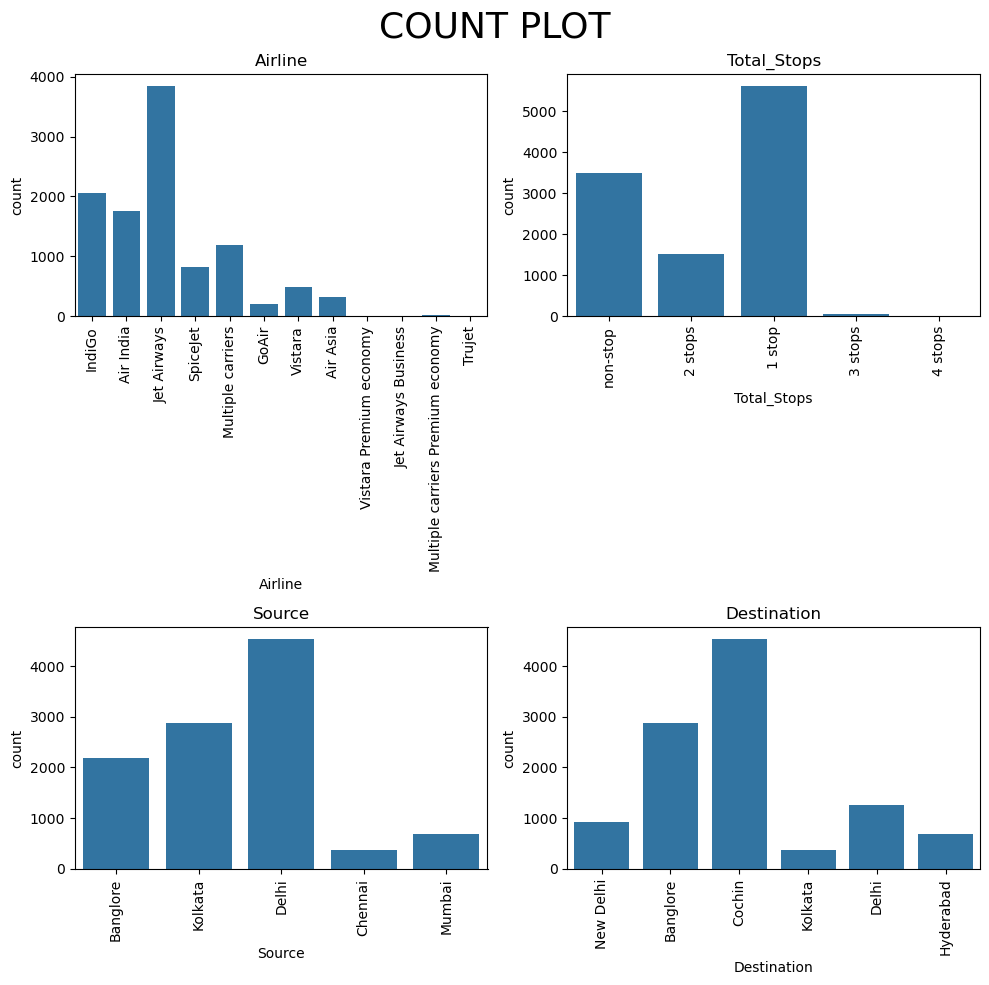

In [38]:
# Countplot 

col = df[['Airline', 'Total_Stops', 'Source', 'Destination']]
plt.figure(figsize=(10,10))
plt.suptitle('COUNT PLOT', fontsize=26)
plt_num = 1

for i in col.columns:  
    if plt_num <= 4:
        br = plt.subplot(2, 2, plt_num)
        sns.countplot(x=df[i])  
        plt.title(i)
        plt.xticks(rotation=90)
    plt_num += 1

plt.tight_layout()
plt.show()


# Insights from countplots

1. Airline:
* Jet Airways is the most frequently used airline.
* Vistara Premium economy, Jet Airways business,Trujet,Muliple carriers Premium economy airlines are not used that much.
* IndiGo, Air India, and SpiceJet airlines are used moderately.

2. Total_stops:
* Most of the flight has only one stop.
* Most travelers prefer flights with 1 stop.

3. Source:
* Most of the flight's source place is Delhi.
* Delhi is the primary hub for departures, followed by Kolkata, highlighting these cities as key travel hubs.

4. Destination:
* Most of the flight's destination is cochin.
* Kolkata and Delhi are moderately served destinations.

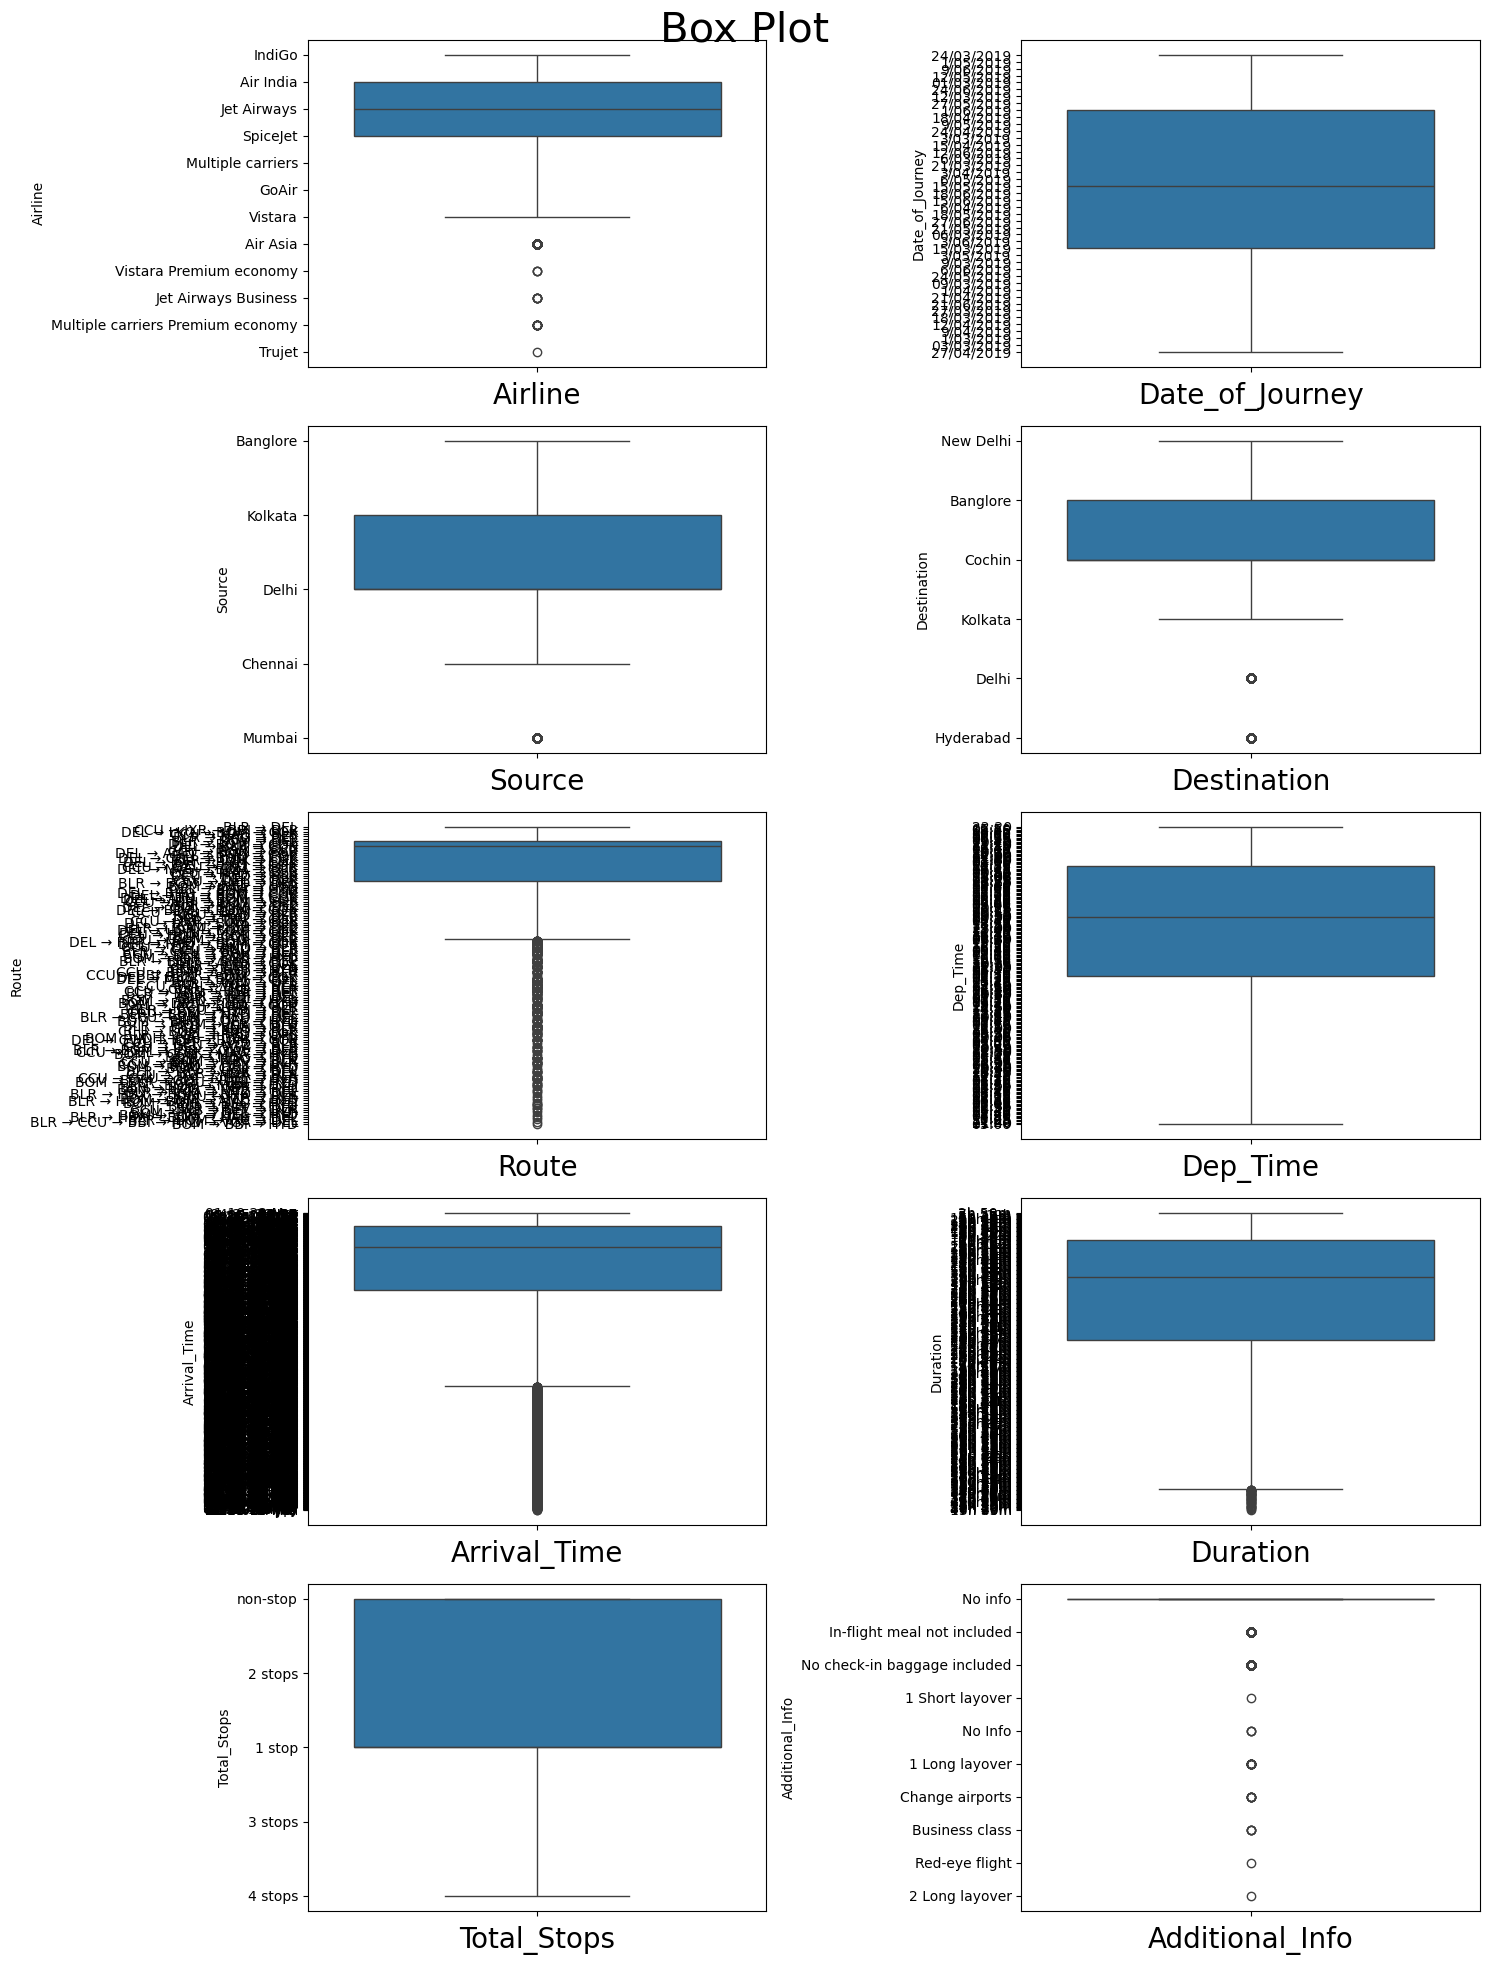

In [41]:
# Box plot for checking outliers

plt.figure(figsize=(15,20))
plt_num = 1
plt.suptitle('Box Plot', fontsize = 30)

for column in df.columns:
    if plt_num<=10:
        bk = plt.subplot(5,2, plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plt_num+=1
plt.tight_layout()


<Axes: ylabel='Price'>

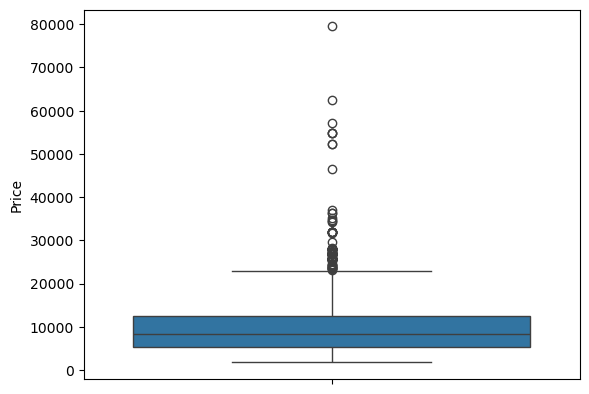

In [42]:
sns.boxplot(y='Price',data=df)

# Insights from boxplot

* Airline,Source,Destination,Route, Arrival_time,Duration,Price these columns have outliers.

# Bivariate analysis 

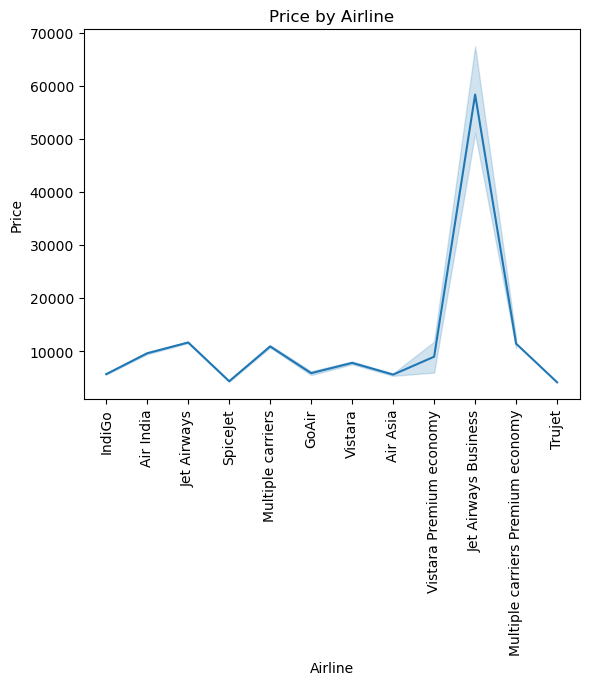

In [46]:
sns.lineplot(x='Airline',y='Price',data=df)
plt.title('Price by Airline')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show() 

## Insights  
* Budget airlines like IndiGo, Air India, and SpiceJet have an average price range of 5000–10000.
* Vistara Premium Economy shows a sharp increase, with prices averaging around 30000.
* Jet Airways Business has the highest prices, peaking at approximately 58000–68000.
* TruJet offers the cheapest tickets, with prices dropping to 4000.


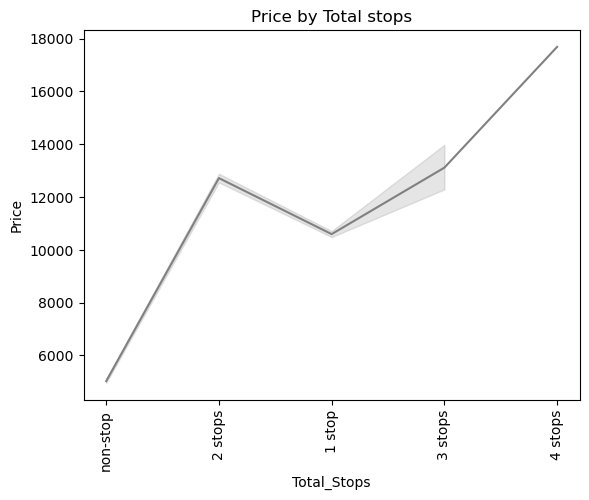

In [48]:
sns.lineplot(x='Total_Stops',y='Price',data=df, color = 'gray')
plt.title('Price by Total stops')
plt.xlabel('Total_Stops')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()


## Insights

* Flights with non-stop have the lowest prices.
* Prices increase significantly for flights with two stops.
* Flights with one stop have lower prices than two stops.
* Flights with four stops have the highest average price, reaching nearly ₹18,000.


# Multivariate analysis

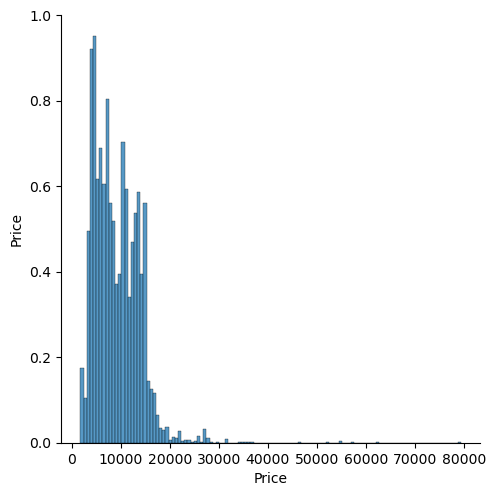

In [51]:
sns.pairplot(df, height=5)
plt.show()

# -----------------------------------Data Preprocessing----------------------------------
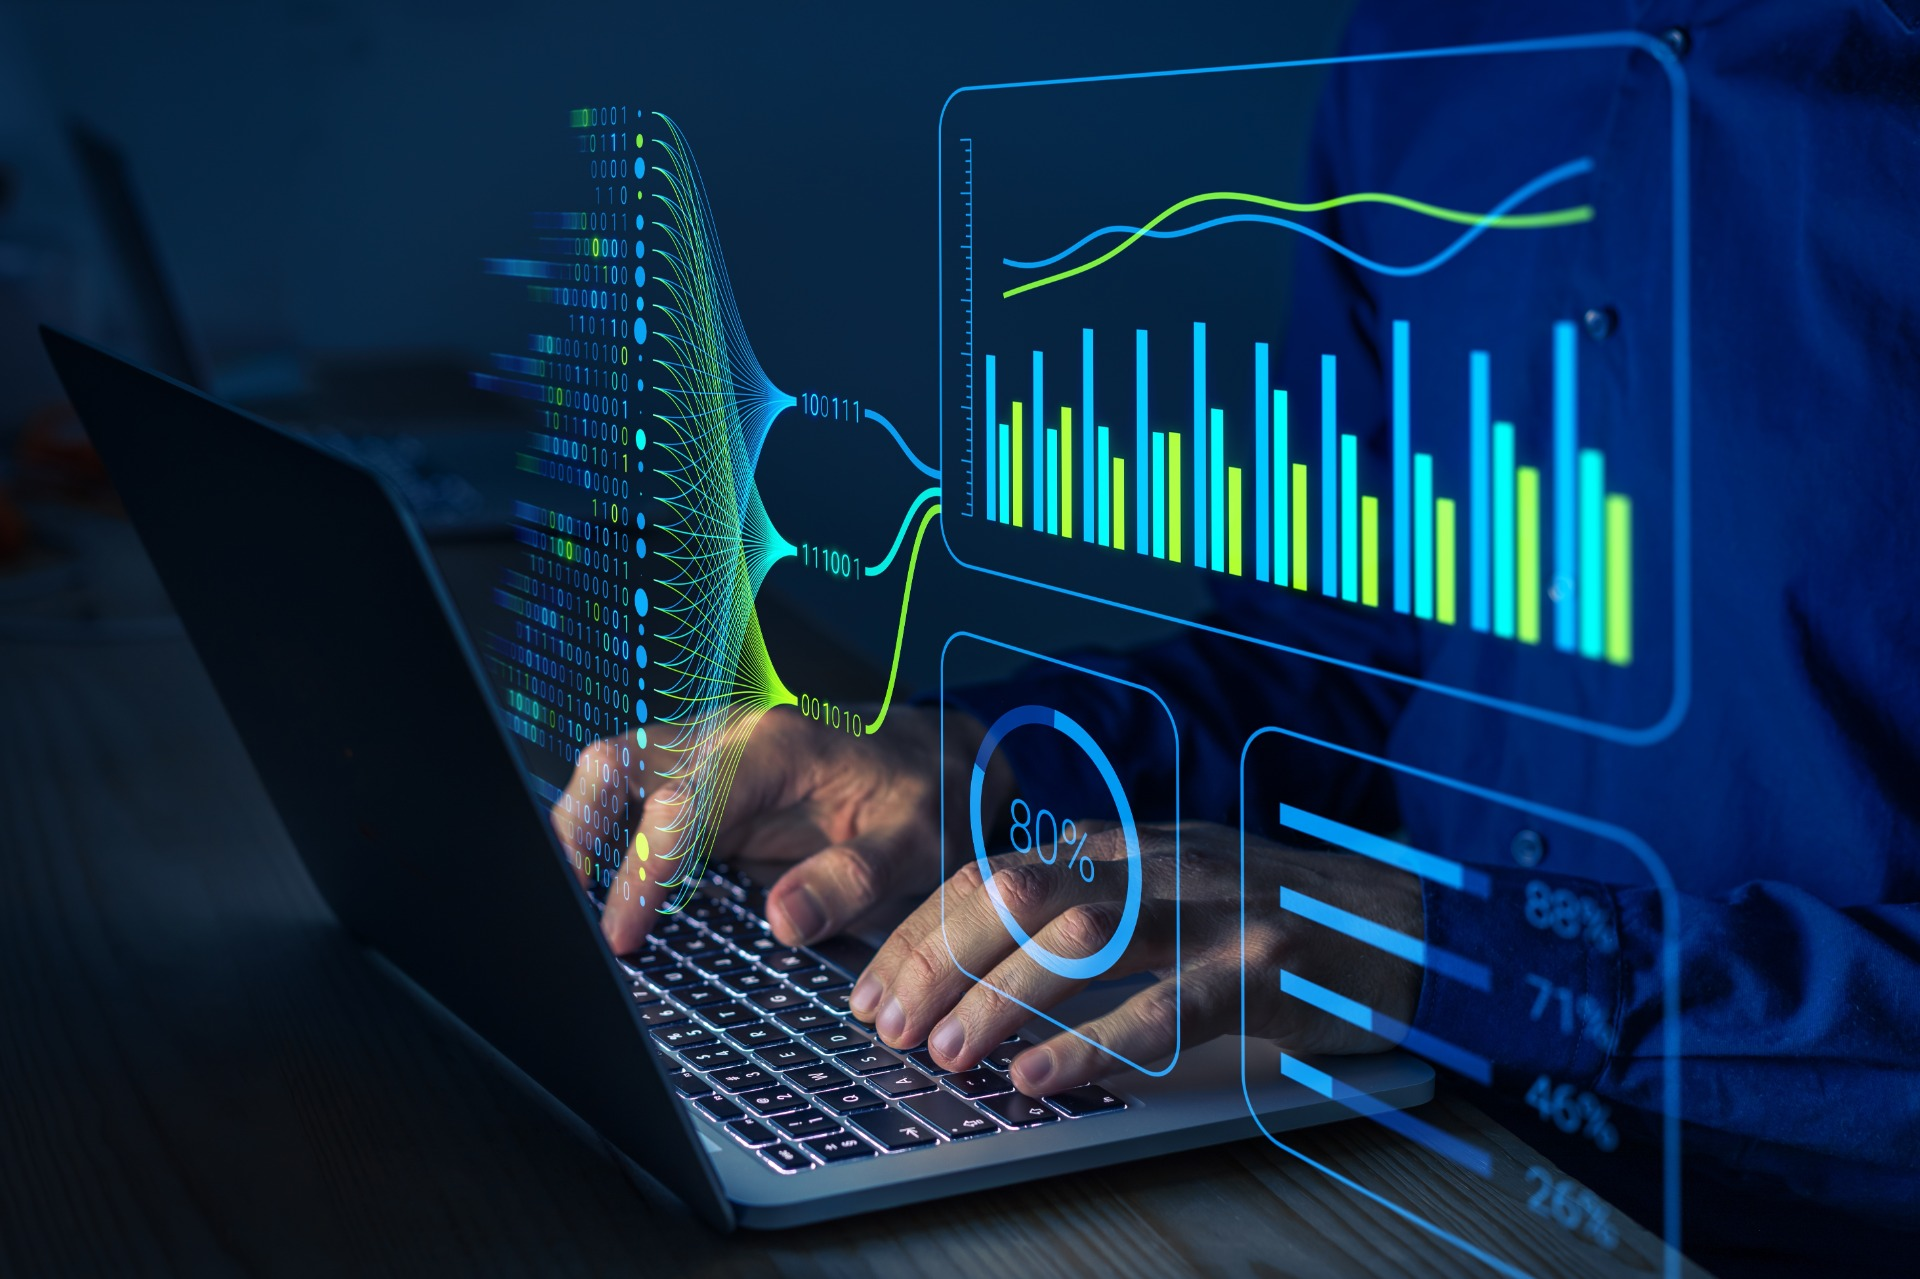

## 1. CHECKING FOR DUPLICATES

In [54]:
duplicates_rows = df[df.duplicated()]
duplicates_rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [55]:
df.duplicated().sum()

220

In [56]:
df.drop_duplicates(inplace=True)
# All 220 duplicates values are droped

# 2. CHECKING THE MISSING VALUES

In [58]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Handling Missing Values
Replacing the missing value for Route and Total_staps column with mode because both the columns are categorical 

In [60]:
df['Route'].fillna(df['Route'].mode()[0],inplace = True )
# By fillna we filling the missing values in Route

In [61]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace = True)
# By fillna we filling the missing values in Total_Stops 

In [62]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# 3. OUTLIERS
Handling outliers for Price column

In [64]:
# Finding Q1 and Q3 
Q1 = df['Price'].quantile(0.25)
print('Lower Quartile',Q1)

Q3 = df['Price'].quantile(0.75)
print('Upper Quartile',Q3)


Lower Quartile 5224.0
Upper Quartile 12343.5


In [65]:
# Finding IQR
IQR = Q3 - Q1
IQR

7119.5

In [66]:
# Finding lower limit and upper limit 
lower_limit = Q1-1.5 * IQR
upper_limit = Q3+1.5 * IQR
print("Lower limit:", lower_limit)
print("upper limit:", upper_limit)

Lower limit: -5455.25
upper limit: 23022.75


In [67]:
df.loc[df['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [68]:
len(df.loc[df['Price']>upper_limit])/len(df)

0.008984038994552232

In [69]:
df.loc[df['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [70]:
# Handling outliers by replacing data with Median as it is below 5%
df.loc[df['Price']>upper_limit, 'Price'] = df['Price'].median()

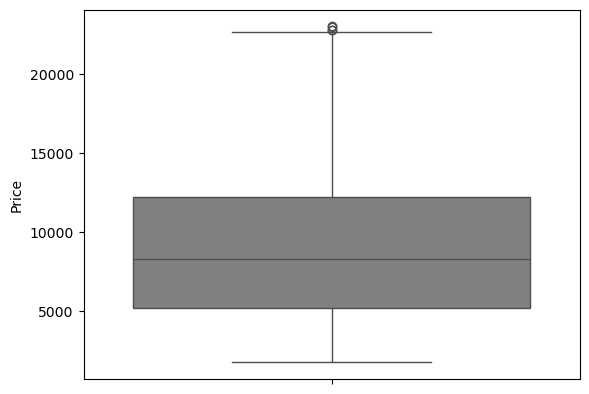

In [71]:
sns.boxplot(y = df.Price, color='gray')
plt.show()

# 4. ENCODING 
# Data_of_Journey

In [73]:
# Date_of_Journey.
#converting object -> datetime format.
#extracting date,Month,year separately and removing Date_of_Journey column.
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
#df['Journey_Year'] = df['Date_of_Journey'].dt.year


df.drop('Date_of_Journey', axis=1, inplace=True)

In [74]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Dep_time

In [76]:
#Dep_time:
#converting object -> datetime format.
#extracting hours,min separately and removing Dep_Time column.
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df.drop('Dep_Time', axis=1, inplace=True)

In [77]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Arrival_Time

In [79]:
#Arrival_Time
#converting object -> datatime format.
#extracting hours, min separately and removing Arrival_Time column.
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute
df.drop('Arrival_Time', axis=1, inplace = True)

In [80]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Duration

In [82]:
duration_split = df['Duration'].str.extract(r'(?:(\d+)h)?\s?(?:(\d+)m)?')
df['Duration_Hours'] = duration_split[0].fillna(0).astype(int)
df['Duration_Minutes'] = duration_split[1].fillna(0).astype(int)
df.drop('Duration', axis=1, inplace = True)

In [83]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Total_Stops

In [85]:
# Map Total_Stops to numeric values
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [86]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


# Route 

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Route_Encoded'] = le.fit_transform(df['Route'])

print(df[['Route_Encoded', 'Price']].corr())
 

               Route_Encoded     Price
Route_Encoded       1.000000  0.240833
Price               0.240833  1.000000


In [89]:
# the correlation between price and route columns is very low so that we can drop it
df.drop(['Route_Encoded'],axis=1,inplace=True)

In [90]:
df.drop(['Route'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


# Additional_Info

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Encoded'] = le.fit_transform(df['Additional_Info'])
print(df[['Additional_Encoded', 'Price']].corr())

                    Additional_Encoded     Price
Additional_Encoded            1.000000 -0.046004
Price                        -0.046004  1.000000


In [93]:
# The correlation between price and additional_info columns is very low so that we can drop it 
df.drop(['Additional_Encoded'], axis=1, inplace=True)

In [94]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [95]:
df.head() #Before encoding all the column

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


# Airline, Source, Destination

In [97]:
df_encoded = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination'], drop_first = True)
df_encoded = df_encoded.astype(int)


In [98]:
df_encoded

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [99]:
df.Duration_Hours.unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39,  0, 41, 40])

In [100]:
df_encoded.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

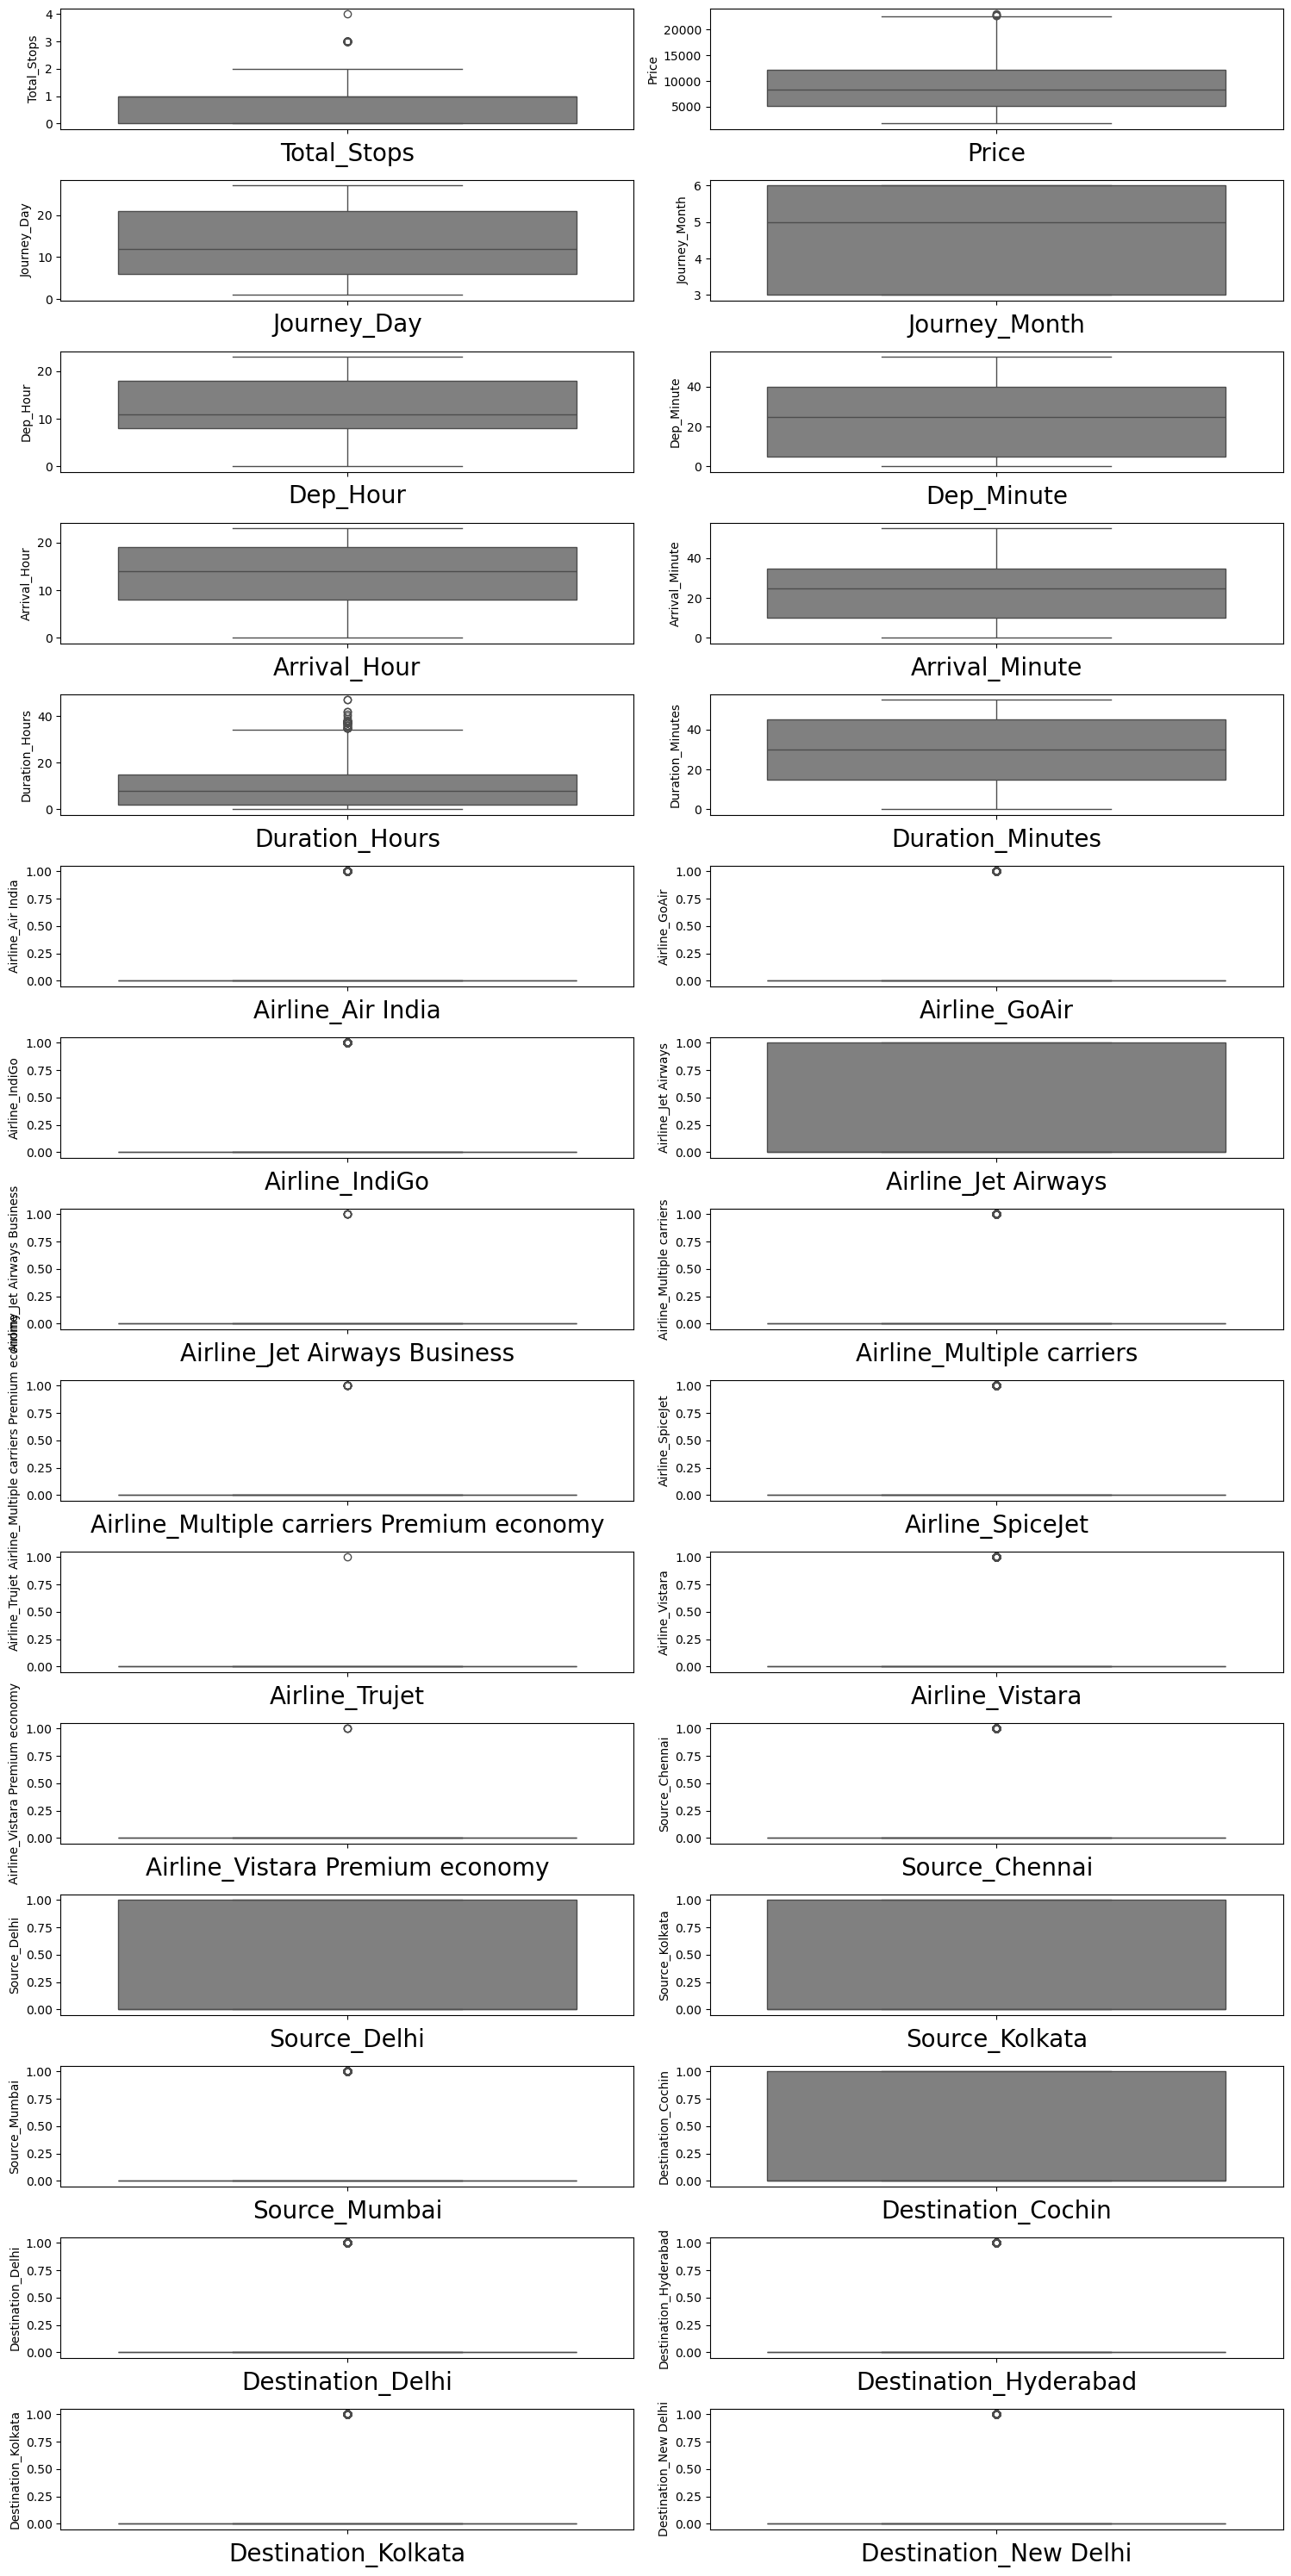

In [101]:
# checking for outliers
plt.figure(figsize=(15,30),facecolor='white')
plt_num=1

for column in df_encoded.columns:
    if plt_num<=30:
        ax=plt.subplot(15,2,plt_num)
        sns.boxplot(df_encoded[column], color = 'gray')
        plt.xlabel(column,fontsize=20)
    plt_num+=1
plt.tight_layout()

# Handling outliers in Duration_Hours column

<Axes: xlabel='Duration_Hours', ylabel='Density'>

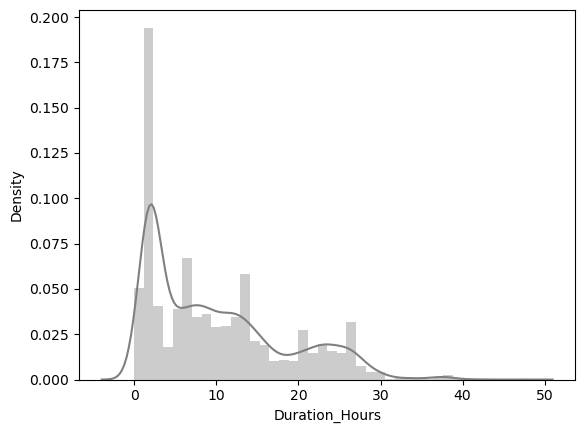

In [103]:
sns.distplot(df_encoded['Duration_Hours'], color = 'gray')

In [104]:
# Duration Hours 
Q1 = df_encoded['Duration_Hours'].quantile(0.25)
print('First Qurtile =',Q1)

First Qurtile = 2.0


In [105]:
Q3 = df_encoded['Duration_Hours'].quantile(0.75)
print('Last Qurtile =',Q3)

Last Qurtile = 15.0


In [106]:
IQR = Q3 - Q1
print('Interquartile range =',IQR)

Interquartile range = 13.0


In [107]:
# Finding the lower limit and upper limit  
Lower_limit = Q1-1.5 * IQR
Upper_limit = Q3+1.5 * IQR
print('Lower_limit =',Lower_limit)
print('Upper_limit =',Upper_limit)

Lower_limit = -17.5
Upper_limit = 34.5


In [108]:
df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
226,2,18799,3,3,5,25,18,50,37,25,...,0,0,1,0,0,1,0,0,0,0
553,2,10598,9,3,5,0,19,15,38,15,...,0,0,1,0,0,1,0,0,0,0
919,3,10991,12,5,12,0,23,15,35,15,...,0,0,0,1,0,0,0,0,0,0
925,2,19907,6,3,16,50,4,25,35,35,...,0,0,1,0,0,1,0,0,0,0
966,2,10493,21,5,5,55,19,15,37,20,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,2,13748,3,3,5,55,19,15,37,20,...,0,0,1,0,0,1,0,0,0,0
10020,2,9653,9,5,5,0,19,15,38,15,...,0,0,1,0,0,1,0,0,0,0
10326,2,11791,3,3,5,50,22,10,40,20,...,0,0,0,0,0,0,0,0,0,1
10456,2,20694,6,3,19,10,18,50,47,40,...,0,0,1,0,0,1,0,0,0,0


In [109]:
len(df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit])/len(df_encoded)

0.006403517155691484

In [110]:
df_encoded.loc[df_encoded['Duration_Hours']<Lower_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


In [111]:
# Handling outliers by replacing data with Median as it is below 5 %
df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit,'Duration_Hours'] = df_encoded['Duration_Hours'].median()

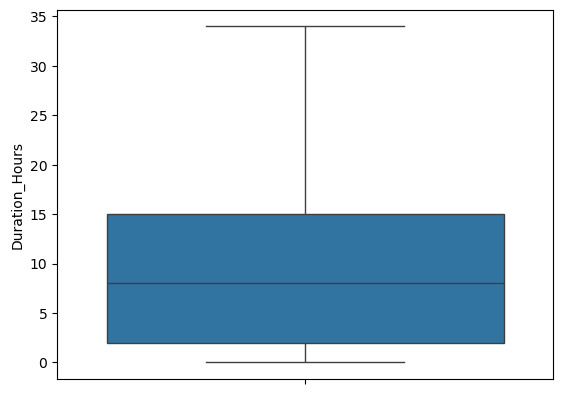

In [112]:
sns.boxplot(y=df_encoded.Duration_Hours)
plt.show()

In [113]:
df_encoded

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [114]:
df_encoded.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_Day                                  0
Journey_Month                                0
Dep_Hour                                     0
Dep_Minute                                   0
Arrival_Hour                                 0
Arrival_Minute                               0
Duration_Hours                               0
Duration_Minutes                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [115]:
df_encoded.dtypes

Total_Stops                                  int32
Price                                        int32
Journey_Day                                  int32
Journey_Month                                int32
Dep_Hour                                     int32
Dep_Minute                                   int32
Arrival_Hour                                 int32
Arrival_Minute                               int32
Duration_Hours                               int32
Duration_Minutes                             int32
Airline_Air India                            int32
Airline_GoAir                                int32
Airline_IndiGo                               int32
Airline_Jet Airways                          int32
Airline_Jet Airways Business                 int32
Airline_Multiple carriers                    int32
Airline_Multiple carriers Premium economy    int32
Airline_SpiceJet                             int32
Airline_Trujet                               int32
Airline_Vistara                

In [116]:
df_encoded.nunique()

Total_Stops                                     5
Price                                        1826
Journey_Day                                    10
Journey_Month                                   4
Dep_Hour                                       24
Dep_Minute                                     12
Arrival_Hour                                   24
Arrival_Minute                                 12
Duration_Hours                                 35
Duration_Minutes                               12
Airline_Air India                               2
Airline_GoAir                                   2
Airline_IndiGo                                  2
Airline_Jet Airways                             2
Airline_Jet Airways Business                    2
Airline_Multiple carriers                       2
Airline_Multiple carriers Premium economy       2
Airline_SpiceJet                                2
Airline_Trujet                                  2
Airline_Vistara                                 2


# 5.SCALING

In [118]:
# Scaling for total_stops, journey_Date, journey_month, dep_hr, dep_min,arrival_hr, arrival_min, duration_hours, Duration_min.
features = df_encoded[['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 
                 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)

In [119]:
df1_scaled= pd.DataFrame(df_scaled, columns=features.columns)

In [120]:
df1_scaled.shape

(10463, 9)

In [121]:
df1_scaled

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-1.214674,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.970330,1.290954
1,1.813113,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,-0.351249,-0.190267
2,1.813113,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,1.134547,-1.671488
3,0.299219,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.598881,-0.190267
4,0.299219,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.722698,0.994710
...,...,...,...,...,...,...,...,...,...
10458,-1.214674,-0.527045,-0.602838,1.138832,1.625992,1.256411,0.016901,-0.970330,0.105977
10459,-1.214674,1.598856,-0.602838,1.313450,1.094501,1.402289,-0.284870,-0.970330,0.402222
10460,-1.214674,1.598856,-0.602838,-0.781968,-0.234226,-0.348251,-0.284870,-0.846514,-1.671488
10461,-1.214674,-1.471890,-1.462170,-0.258114,0.297265,0.089384,-0.888411,-0.970330,0.698466


In [122]:
df1_scaled.isnull().sum()

Total_Stops         0
Journey_Day         0
Journey_Month       0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [123]:
df_encoded.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [124]:
non_scaled = ['Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi','Price']

In [125]:
df_non_scaled = df_encoded[non_scaled]
df_non_scaled

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3897
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7662
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,13882
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6218
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4107
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4145
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7229
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,12648


In [126]:
print(df1_scaled.shape)   
print(df_non_scaled.shape)  

(10463, 9)
(10463, 21)


In [127]:
df1_scaled.reset_index(drop=True, inplace=True)
df_non_scaled.reset_index(drop=True, inplace=True)



In [128]:
data= pd.concat([df1_scaled, df_non_scaled], axis=1)
data

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,-1.214674,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.970330,1.290954,0,...,0,0,0,0,0,0,0,0,1,3897
1,1.813113,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,-0.351249,-0.190267,1,...,0,0,1,0,0,0,0,0,0,7662
2,1.813113,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,1.134547,-1.671488,0,...,0,1,0,0,1,0,0,0,0,13882
3,0.299219,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.598881,-0.190267,0,...,0,0,1,0,0,0,0,0,0,6218
4,0.299219,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.722698,0.994710,0,...,0,0,0,0,0,0,0,0,1,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,-1.214674,-0.527045,-0.602838,1.138832,1.625992,1.256411,0.016901,-0.970330,0.105977,0,...,0,0,1,0,0,0,0,0,0,4107
10459,-1.214674,1.598856,-0.602838,1.313450,1.094501,1.402289,-0.284870,-0.970330,0.402222,1,...,0,0,1,0,0,0,0,0,0,4145
10460,-1.214674,1.598856,-0.602838,-0.781968,-0.234226,-0.348251,-0.284870,-0.846514,-1.671488,0,...,0,0,0,0,0,1,0,0,0,7229
10461,-1.214674,-1.471890,-1.462170,-0.258114,0.297265,0.089384,-0.888411,-0.970330,0.698466,0,...,0,0,0,0,0,0,0,0,1,12648


# FEATURE ENGINEERING

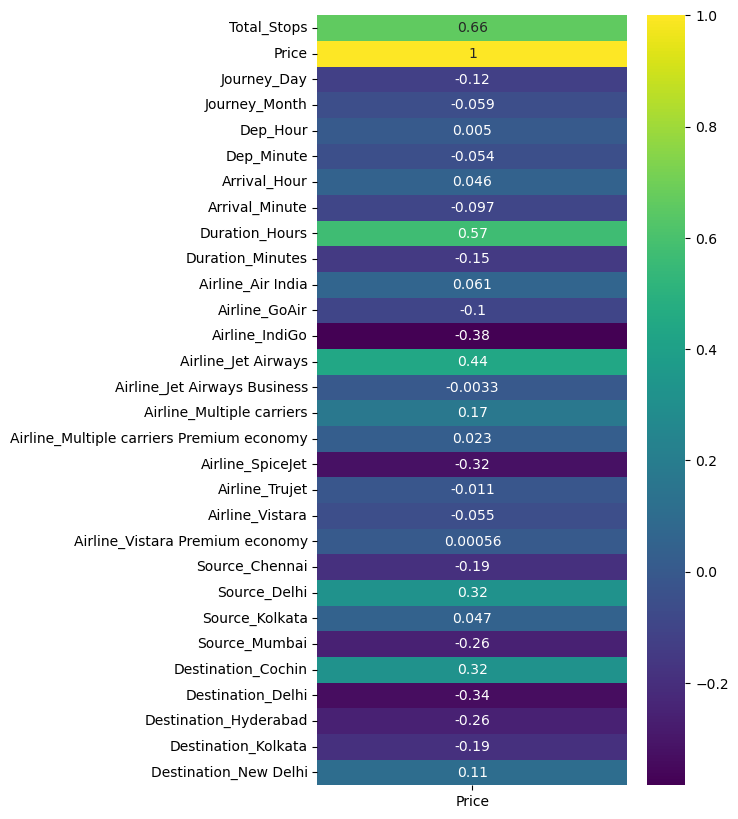

In [130]:
corr=df_encoded.corr()[['Price']]
plt.figure(figsize=(5,10))
sns.heatmap(corr,annot=True,cmap = 'viridis')
plt.show()

# Insight from Heatmap
* total_stops feature has 66% based on price(target column)

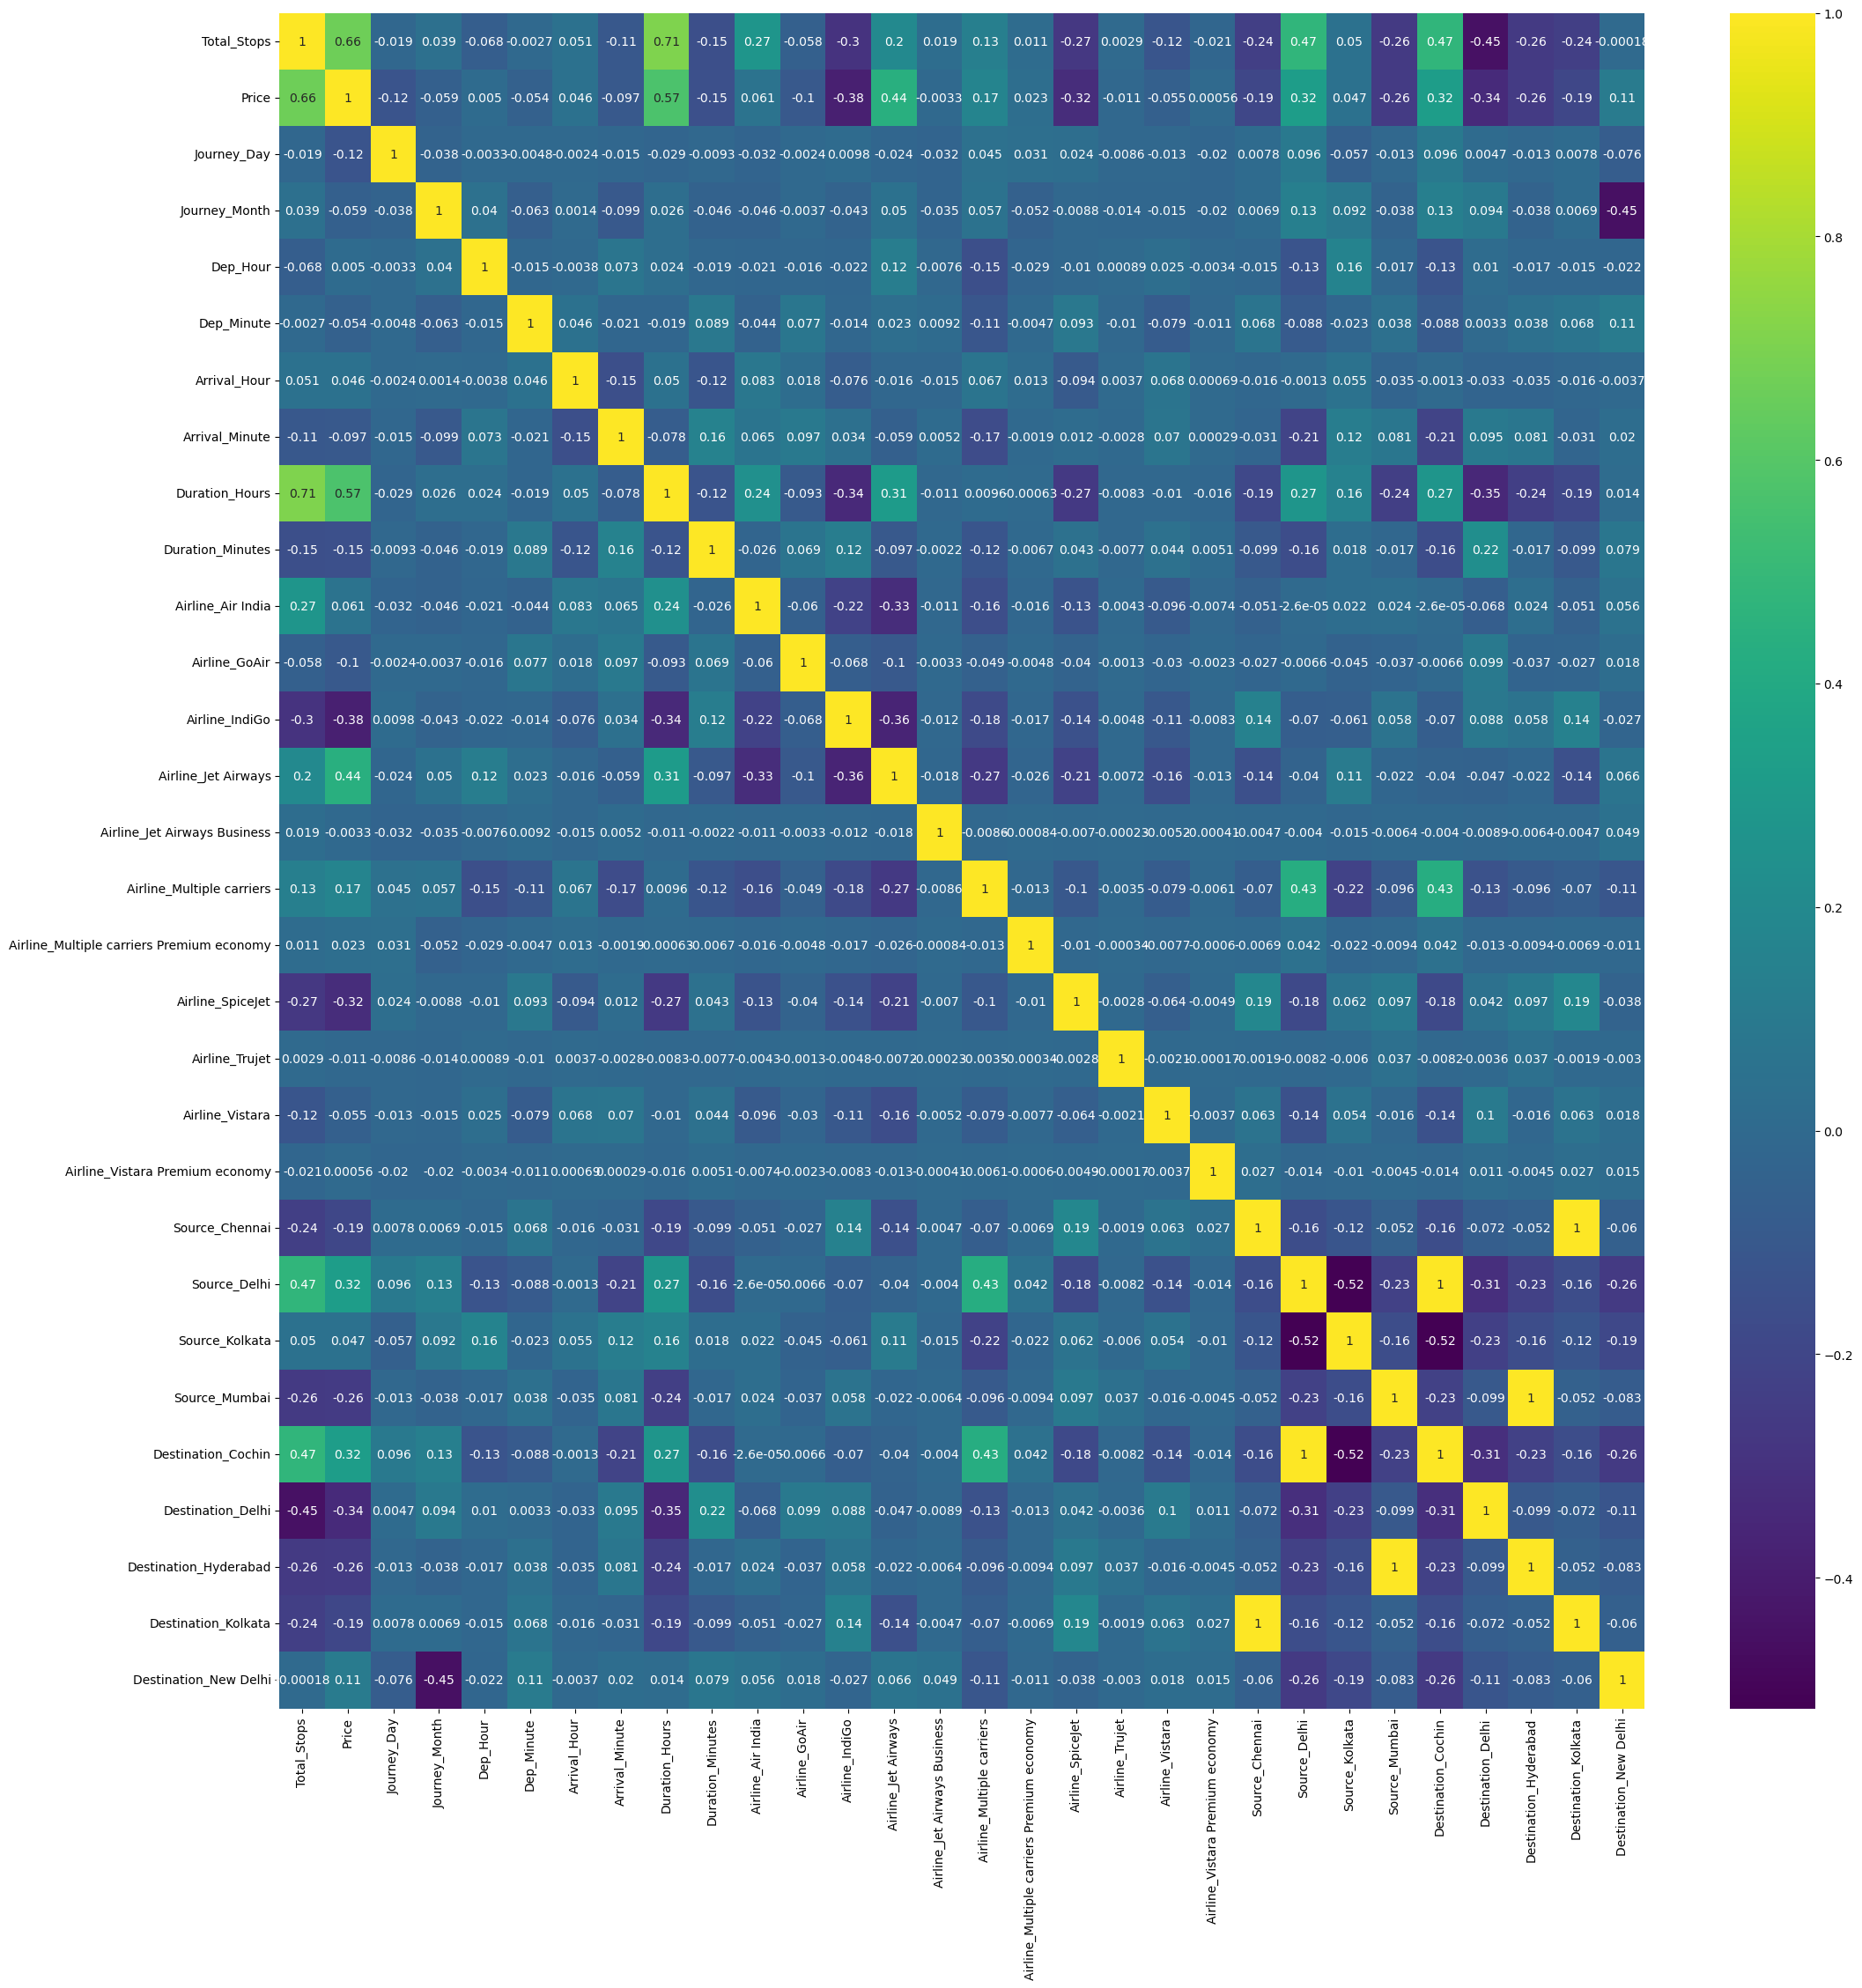

In [132]:
plt.figure(figsize=(25,25))
sns.heatmap(df_encoded.corr(),annot=True,cmap='viridis')
plt.show()

# MODEL BUILDING 

In [134]:
df_encoded.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [135]:
# spliting dependent and independent column
x=df_encoded.drop('Price',axis=1)
y=df_encoded['Price']

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [137]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7847, 29)
(2616, 29)
(7847,)
(2616,)


# Evaluation Metrics

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def model_evaluation(model, x_train, y_train, x_test, y_test):
    # Predict on the training data
    y_train_pred = model.predict(x_train)
    \
    # Calculate metrics for the training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Print training data metrics
    print(f"Training Data R-squared: {train_r2:.2f}")
    print(f"Training Data MAE: {train_mae:.2f}")
    print(f"Training Data MSE: {train_mse:.2f}")
    print(f"Training Data RMSE: {train_rmse:.2f}")

    # Predict on the test data
    y_test_pred = model.predict(x_test)

    # Calculate metrics for the test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Print test data metrics
    print(f"\nTest Data R-squared: {test_r2:.2f}")
    print(f"Test Data MAE: {test_mae:.2f}")
    print(f"Test Data MSE: {test_mse:.2f}")
    print(f"Test Data RMSE: {test_rmse:.2f}")

    metrics_df = pd.DataFrame({
        "Metric": ["R-squared", "MAE", "MSE", "RMSE"],
        "Training": [train_r2, train_mae, train_mse, train_rmse],
        "Testing": [test_r2, test_mae, test_mse, test_rmse]
    })
    metrics_df["Training"] = metrics_df["Training"].apply(lambda x: f"{x:,.2f}")
    metrics_df["Testing"] = metrics_df["Testing"].apply(lambda x: f"{x:,.2f}")

    
    
    return metrics_df

# Model: 1 Linear regression

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import*
m1=LinearRegression()#object creation
m1.fit(x_train,y_train)# training

LinearRegression()

In [184]:
y_predict=m1.predict(x_test)


In [186]:
pd.DataFrame({'Actual':y_test,'Prediction':y_predict,'error':y_test-y_predict})

,Actual,Prediction,error
7659,15894,11270.052280,4623.947720
8235,8366,11822.074477,-3456.074477
3585,3943,4036.863931,-93.863931
7625,8085,9457.463561,-1372.463561
4812,4049,8222.144397,-4173.144397
...,...,...,...
9015,11728,12081.885177,-353.885177
6025,11507,14090.666081,-2583.666081
2840,10197,10399.290009,-202.290009
4896,6637,10459.900076,-3822.900076


In [188]:
model_evaluation(m1, x_train, y_train, x_test, y_test)

Training Data R-squared: 0.64
Training Data MAE: 1827.35
Training Data MSE: 6045195.82
Training Data RMSE: 2458.70

Test Data R-squared: 0.64
Test Data MAE: 1816.74
Test Data MSE: 5811518.81
Test Data RMSE: 2410.71


,Metric,Training,Testing
0,R-squared,0.64,0.64
1,MAE,"1,827.35","1,816.74"
2,MSE,"6,045,195.82","5,811,518.81"
3,RMSE,"2,458.70","2,410.71"


* R² (0.64): Model explains 64% of variance, indicating decent performance.
  
* MAE, MSE, RMSE: Similar values for both training and test data, showing consistent and stable performance.
  
* The model performs well on both training and test data, without overfitting or underfitting.

In [191]:
# checking cross validation scores
from sklearn.model_selection import cross_val_score

In [193]:
scores=cross_val_score(m1,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.63312335 0.63387823 0.63280416]
cross validation score: 0.6332685810944391
std: 0.00045035190762725177


* cv score : 0.633 -> the model explains 63.3 % of the variance
* std : 0.00045 -> indicates stable and consistent performance across folds

* conclusion: The model generalizes well with minimal vairation in performance.

# Model: 2 Support vector machine regressor

In [197]:
from sklearn.svm import SVR
m2=SVR()
m2.fit(x_train,y_train)

SVR()

In [198]:
y_pred=m2.predict(x_test)
y_pred

array([8128.20060514, 8080.85859014, 8001.38360252, ..., 8432.39797174,
       8243.11095776, 7953.53550667])

In [199]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,8128.200605,7765.799395
8235,8366,8080.858590,285.141410
3585,3943,8001.383603,-4058.383603
7625,8085,8523.805986,-438.805986
4812,4049,7977.871265,-3928.871265
...,...,...,...
9015,11728,8170.670901,3557.329099
6025,11507,8312.728739,3194.271261
2840,10197,8432.397972,1764.602028
4896,6637,8243.110958,-1606.110958


In [200]:
model_evaluation(m2,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.01
Training Data MAE: 3351.45
Training Data MSE: 16396845.57
Training Data RMSE: 4049.30

Test Data R-squared: 0.01
Test Data MAE: 3304.09
Test Data MSE: 15732026.79
Test Data RMSE: 3966.36


,Metric,Training,Testing
0,R-squared,0.01,0.01
1,MAE,"3,351.45","3,304.09"
2,MSE,"16,396,845.57","15,732,026.79"
3,RMSE,"4,049.30","3,966.36"


* R-squared of 0.01, high MAE (3300–3350), MSE, and RMSE indicate poor model performance.
  
* The model's predictions are inaccurate and need improvement.

In [202]:
scores=cross_val_score(m2,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[-0.00740501  0.01124912  0.01540058]
cross validation score: 0.0064148961979773045
std: 0.009918033228009219


* cv score: 0.0064 and SD: 0.0099 -> the model indicates poor perfomance

* HYPERPARAMETER TUNING FOR SVR

In [205]:
from sklearn.model_selection import*

In [206]:
M2=SVR()
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001], 
    'kernel':['linear']
}

grid= GridSearchCV(M2, param_grid,cv=3, verbose=1, scoring='r2', n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             scoring='r2', verbose=1)

In [207]:
print("Best parameters found:",grid.best_params_)
print('Best Estimators:',grid.best_estimator_)

Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best Estimators: SVR(C=100, gamma=1, kernel='linear')


In [208]:
best_svr_m2=SVR(C=100,gamma=1,kernel='linear')
best_svr_m2.fit(x_train,y_train)

SVR(C=100, gamma=1, kernel='linear')

In [209]:
y_pred=best_svr_m2.predict(x_test)
y_pred

array([10985.12422441, 11328.95344611,  4206.21006813, ...,
        9976.61166625, 10004.78229682,  5152.37044299])

In [210]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,10985.124224,4908.875776
8235,8366,11328.953446,-2962.953446
3585,3943,4206.210068,-263.210068
7625,8085,8860.866568,-775.866568
4812,4049,8068.849308,-4019.849308
...,...,...,...
9015,11728,12076.907451,-348.907451
6025,11507,13187.309236,-1680.309236
2840,10197,9976.611666,220.388334
4896,6637,10004.782297,-3367.782297


In [211]:
model_evaluation(best_svr_m2,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.61
Training Data MAE: 1786.61
Training Data MSE: 6383173.53
Training Data RMSE: 2526.49

Test Data R-squared: 0.61
Test Data MAE: 1780.48
Test Data MSE: 6140180.14
Test Data RMSE: 2477.94


,Metric,Training,Testing
0,R-squared,0.61,0.61
1,MAE,"1,786.61","1,780.48"
2,MSE,"6,383,173.53","6,140,180.14"
3,RMSE,"2,526.49","2,477.94"


* The best parameter after hyper parameter tuning we got -> SVR(C=100, gamma=1, kernel='linear')

* The r2 score is increased from 0.01 to 0.61 for both training and testing data after tuning, indicating a decent performance.

* MAE decreased from 1786.61 to 1780.48.

* MSE dropped from 6,383,173.53 to 6,140,180.14.

* RMSE reduced from 2526.49 to 2477.94.

* the model is now generalizes well with minimal performance after hyperparameter tuning.


In [213]:
scores=cross_val_score(best_svr_m2,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.61674469 0.60712331 0.61636457]
cross validation score: 0.6134108574098196
std: 0.004448672336888472


* cv score : 0.61 and SD: 0.0044 -> the model shows significant improvement over the preivous model .



# Model : 3 Descision Tree Regressor

In [216]:
from sklearn.tree import DecisionTreeRegressor
m3=DecisionTreeRegressor()
m3.fit(x_train,y_train)

DecisionTreeRegressor()

In [217]:
y_pred=m3.predict(x_test)
y_pred

array([14214., 11003.,  3943., ..., 10197., 12537.,  5613.])

In [218]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,14214.0,1680.0
8235,8366,11003.0,-2637.0
3585,3943,3943.0,0.0
7625,8085,8085.0,0.0
4812,4049,6860.0,-2811.0
...,...,...,...
9015,11728,12303.0,-575.0
6025,11507,11830.0,-323.0
2840,10197,10197.0,0.0
4896,6637,12537.0,-5900.0


In [219]:
model_evaluation(m3,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.96
Training Data MAE: 291.17
Training Data MSE: 589318.87
Training Data RMSE: 767.67

Test Data R-squared: 0.65
Test Data MAE: 1400.08
Test Data MSE: 5574305.49
Test Data RMSE: 2361.00


,Metric,Training,Testing
0,R-squared,0.96,0.65
1,MAE,291.17,"1,400.08"
2,MSE,"589,318.87","5,574,305.49"
3,RMSE,767.67,"2,361.00"


* R2 score for training 0.96 and for testing 0.66 -> the model performs well on training data and more less on unseen data -> which indicates overfitting.

* Need hyperparameter tuning.

In [221]:
scores=cross_val_score(m3,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.67073392 0.6722722  0.6353587 ]
cross validation score: 0.6594549371149719
std: 0.01705018485588557


* cv score : 0.668 and SD: 0.012 -> model performance is moderate.

* HYPERPARAMETER TUNING FOR DECISION TREE

In [224]:
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum samples required to be at a leaf node
    'criterion': ['squared_error', 'friedman_mse'],  # For regression, use "mse" or "mae"
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_leaf_nodes': [10, 20, 50]  # Maximum number of leaf nodes
}
    

In [225]:
dt=DecisionTreeRegressor()
gridsearch = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='r2',error_score='raise')
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [226]:
print("Best parameters found:",gridsearch.best_params_)
print('Best Estimators:',gridsearch.best_estimator_)

Best parameters found: {'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 4, 'min_samples_split': 20, 'splitter': 'best'}
Best Estimators: DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)


In [227]:
best_dt=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)
best_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)

In [228]:
y_pred=best_dt.predict(x_test)

In [229]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,12097.251397,3796.748603
8235,8366,12097.251397,-3731.251397
3585,3943,4408.212082,-465.212082
7625,8085,8154.856263,-69.856263
4812,4049,6236.537572,-2187.537572
...,...,...,...
9015,11728,12097.251397,-369.251397
6025,11507,12926.342593,-1419.342593
2840,10197,11697.748792,-1500.748792
4896,6637,9572.423913,-2935.423913


In [230]:
model_evaluation(best_dt,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.75
Training Data MAE: 1494.17
Training Data MSE: 4132845.55
Training Data RMSE: 2032.94

Test Data R-squared: 0.75
Test Data MAE: 1522.53
Test Data MSE: 4059659.57
Test Data RMSE: 2014.86


,Metric,Training,Testing
0,R-squared,0.75,0.75
1,MAE,"1,494.17","1,522.53"
2,MSE,"4,132,845.55","4,059,659.57"
3,RMSE,"2,032.94","2,014.86"


* R2 score for both train and test data : 0.75 -> good fit and consistent performance.

* The model is performing well after tuning and the model is now generalized.

In [232]:
scores=cross_val_score(best_dt,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.72369467 0.7369361  0.71205983]
cross validation score: 0.7242301994714806
std: 0.010162752960718247


* cv score: 0.724 and SD : 0.0099 -> model performance is moderate.

# Model 4: Random forest

In [235]:
from sklearn.ensemble import RandomForestRegressor
m4=RandomForestRegressor()
m4.fit(x_train,y_train)

RandomForestRegressor()

In [236]:
y_pred=m4.predict(x_test)

In [237]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,13759.383333,2134.616667
8235,8366,10300.070000,-1934.070000
3585,3943,3949.850000,-6.850000
7625,8085,8425.110000,-340.110000
4812,4049,5687.023333,-1638.023333
...,...,...,...
9015,11728,10715.925000,1012.075000
6025,11507,11924.080333,-417.080333
2840,10197,10458.330000,-261.330000
4896,6637,9167.833333,-2530.833333


In [238]:
model_evaluation(m4,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.95
Training Data MAE: 551.62
Training Data MSE: 853175.39
Training Data RMSE: 923.67

Test Data R-squared: 0.79
Test Data MAE: 1181.10
Test Data MSE: 3365294.97
Test Data RMSE: 1834.47


,Metric,Training,Testing
0,R-squared,0.95,0.79
1,MAE,551.62,"1,181.10"
2,MSE,"853,175.39","3,365,294.97"
3,RMSE,923.67,"1,834.47"


R2 score for training 0.95 and for testing 0.79 -> the model performs well on training data and more less on unseen data -> which indicates overfitting.

Need hyperparameter tuning.

In [240]:
scores=cross_val_score(m4,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.80100624 0.80089014 0.78179665]
cross validation score: 0.7945643474912022
std: 0.00902824652899399


* cv score: 0.79 and SD : 0.0099 -> model performance is strong.

In [242]:
# using decision tree parameters 
rf_dt=RandomForestRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)
rf_dt.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)

In [243]:
y_pred=rf_dt.predict(x_test)

In [244]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,11782.344593,4111.655407
8235,8366,11774.573696,-3408.573696
3585,3943,4430.563857,-487.563857
7625,8085,8256.122395,-171.122395
4812,4049,6485.085164,-2436.085164
...,...,...,...
9015,11728,12112.270798,-384.270798
6025,11507,12821.585340,-1314.585340
2840,10197,10640.225208,-443.225208
4896,6637,9381.187831,-2744.187831


In [245]:
model_evaluation(rf_dt,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.78
Training Data MAE: 1427.60
Training Data MSE: 3675716.29
Training Data RMSE: 1917.22

Test Data R-squared: 0.76
Test Data MAE: 1475.85
Test Data MSE: 3807173.52
Test Data RMSE: 1951.20


,Metric,Training,Testing
0,R-squared,0.78,0.76
1,MAE,"1,427.60","1,475.85"
2,MSE,"3,675,716.29","3,807,173.52"
3,RMSE,"1,917.22","1,951.20"


* here i used the hyperparameters which i got for decisiontree regressor .

* i got r2 score as 0.78 for training and 0.76 for testing a slight improvement from decision tree regressor.

* the model performance is good and now it is generalised.

In [247]:
scores=cross_val_score(rf_dt,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good

[0.75950721 0.75842569 0.74941082]
cross validation score: 0.7557812388098268
std: 0.004526155751482869


* cv score: 0.75 -> model performance is moderate.
* HYPERPARAMETER TUNING FOR RANDOM FOREST

In [249]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2',None]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1, error_score='raise')
grid.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 300, 400]},
             scoring='r2', verbose=1)

In [250]:
print("Best parameters found:",grid.best_params_)
print('Best Estimators:',grid.best_estimator_)

Best parameters found: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 400}
Best Estimators: RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=42)


In [251]:
best_rf=RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=42)
best_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=42)

In [252]:
model_evaluation(best_rf,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.89
Training Data MAE: 912.72
Training Data MSE: 1896939.75
Training Data RMSE: 1377.29

Test Data R-squared: 0.82
Test Data MAE: 1150.71
Test Data MSE: 2866979.51
Test Data RMSE: 1693.22


,Metric,Training,Testing
0,R-squared,0.89,0.82
1,MAE,912.72,"1,150.71"
2,MSE,"1,896,939.75","2,866,979.51"
3,RMSE,"1,377.29","1,693.22"


* r2 score i got 0.95 for training and 0.79 for testing before tuning .

* now r2 socre for train 0.89 and test 0.82-> the model is now improved / generalized after tuning.

In [254]:
scores=cross_val_score(best_rf,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good


[0.81707305 0.81443975 0.79709732]
cross validation score: 0.8095367107149812
std: 0.00886142715108341


* cv score: 0.81 -> the mdoel performs well

# MODEL : 5 GRADIENT BOOSTING

In [257]:
from sklearn.ensemble import GradientBoostingRegressor

In [258]:
m5=GradientBoostingRegressor()
m5.fit(x_train,y_train)

GradientBoostingRegressor()

In [259]:
y_pred=m5.predict(x_test)

In [260]:
y_pred

array([11335.82084512, 11540.56829658,  4822.32926212, ...,
       10421.06714128,  8755.29431628,  5271.70975299])

In [261]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,11335.820845,4558.179155
8235,8366,11540.568297,-3174.568297
3585,3943,4822.329262,-879.329262
7625,8085,8865.207226,-780.207226
4812,4049,6550.355732,-2501.355732
...,...,...,...
9015,11728,10700.813743,1027.186257
6025,11507,13320.007359,-1813.007359
2840,10197,10421.067141,-224.067141
4896,6637,8755.294316,-2118.294316


In [262]:
model_evaluation(m5,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.76
Training Data MAE: 1467.69
Training Data MSE: 3949857.68
Training Data RMSE: 1987.42

Test Data R-squared: 0.75
Test Data MAE: 1494.73
Test Data MSE: 3973355.56
Test Data RMSE: 1993.33


,Metric,Training,Testing
0,R-squared,0.76,0.75
1,MAE,"1,467.69","1,494.73"
2,MSE,"3,949,857.68","3,973,355.56"
3,RMSE,"1,987.42","1,993.33"


* r2 score for training 0.76 and testing 0.75 -> this implies that the performance the model is similar for both training and testing data.

* the model generalizes well with overfitting.

* still we try to do hyperparameter tuning to increase the performance of the model.

In [264]:
scores=cross_val_score(m5,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())
#std of <0.05 is good


[0.74966687 0.7542665  0.74199925]
cross validation score: 0.7486442066611044
std: 0.005060019386707946


* cv score 0.74 -> indicates consistent performance across different folds .

* the model generalizes well.

* HYPERPARAMETER TUNING FOR GRADIENT BOOSTING

In [267]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingRegressor()
grid = GridSearchCV(estimator=gb, scoring='r2', param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, error_score='raise')
grid.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingRegressor(),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [268]:
print("Best parameters found:",grid.best_params_)
print('Best Estimators:',grid.best_estimator_)

Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Estimators: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)


In [269]:
best_gb=GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)
best_gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

In [270]:
model_evaluation(best_gb,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.91
Training Data MAE: 860.42
Training Data MSE: 1480742.16
Training Data RMSE: 1216.86

Test Data R-squared: 0.83
Test Data MAE: 1137.22
Test Data MSE: 2670704.47
Test Data RMSE: 1634.23


,Metric,Training,Testing
0,R-squared,0.91,0.83
1,MAE,860.42,"1,137.22"
2,MSE,"1,480,742.16","2,670,704.47"
3,RMSE,"1,216.86","1,634.23"


* r2 score for training 0.76 and testing 0.75 before tuning.

* after tuning i got r2 score as 0.91 for training and 0.83 for testing -> indicates that model is improved compared to previous.

* there is no significant overfitting is present , the model is generalized.

In [272]:
scores=cross_val_score(best_gb,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.8318159 0.8336613 0.8121337]
cross validation score: 0.8258702970970871
std: 0.009742414894926454


* cv score 0.83 -> the model performs well across different folds.

* the model generalizes well.

## MODEL : 6 XGBOOSTING

In [275]:
from xgboost import XGBRegressor

m6 = XGBRegressor()
m6.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [276]:
y_pred=m6.predict(x_test)
y_pred

array([12840.511 , 10406.621 ,  4070.384 , ..., 10827.921 ,  8663.375 ,
        5215.6694], dtype=float32)

In [277]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,12840.510742,3053.489258
8235,8366,10406.621094,-2040.621094
3585,3943,4070.384033,-127.384033
7625,8085,8877.297852,-792.297852
4812,4049,5394.707520,-1345.707520
...,...,...,...
9015,11728,9406.850586,2321.149414
6025,11507,12191.608398,-684.608398
2840,10197,10827.920898,-630.920898
4896,6637,8663.375000,-2026.375000


In [278]:
model_evaluation(m6,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.92
Training Data MAE: 790.87
Training Data MSE: 1290965.26
Training Data RMSE: 1136.21

Test Data R-squared: 0.83
Test Data MAE: 1131.10
Test Data MSE: 2692551.86
Test Data RMSE: 1640.90


,Metric,Training,Testing
0,R-squared,0.92,0.83
1,MAE,790.87,"1,131.10"
2,MSE,"1,290,965.26","2,692,551.86"
3,RMSE,"1,136.21","1,640.90"


* r2 score for training 0.92 and testing 0.83 -> this implies that the performance the model is similar for both training and testing data.

* the model generalizes well with overfitting.

* still we try to do hyperparameter tuning to increase the performance of the model.

In [280]:
scores=cross_val_score(m6,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.82891185 0.82972288 0.8096909 ]
cross validation score: 0.8227752093636397
std: 0.009257925960792267


* cv score 0.82 -> indicates consistent performance across different folds .

* the model generalizes well.

* HYPERPARAMETER TUNING FOR XGBOOSTING

In [283]:
param_grid={
    'n_estimators': [100, 150, 300, 1000],               
    'learning_rate': [0.05, 0.1, 0.15, 0.25],            
    'max_depth': [4, 6, 8, 12],
             }
best_xg=XGBRegressor()
grid=GridSearchCV(best_xg,param_grid,cv=3,scoring='r2',verbose=1,n_jobs=-1,error_score='raise')
grid.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.25],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [100, 150, 300, 1000]},
             scoring='r2', verbose=1)

In [284]:
print("Best parameters found:",grid.best_params_)
print('Best Estimators:',grid.best_estimator_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Best Estimators: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [285]:
xgb=XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 200)
xgb.fit(x_train,y_train)
model_evaluation(xgb,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.90
Training Data MAE: 897.90
Training Data MSE: 1583764.88
Training Data RMSE: 1258.48

Test Data R-squared: 0.84
Test Data MAE: 1140.34
Test Data MSE: 2617701.05
Test Data RMSE: 1617.93


,Metric,Training,Testing
0,R-squared,0.90,0.84
1,MAE,897.90,"1,140.34"
2,MSE,"1,583,764.88","2,617,701.05"
3,RMSE,"1,258.48","1,617.93"


* r score for training 0.92 and testing 0.83 -> before tuning
  
* r2 score for training 0.90 and testing 0.84 -> after tuning the the test score is slightly increased an train score is decreased.

* the model generalizes well.


In [287]:
scores=cross_val_score(xgb,x,y,cv=3,scoring='r2')
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.83211901 0.83475501 0.81643634]
cross validation score: 0.8277701165300174
std: 0.00808612062360485


* cv score 0.83 -> indicates consistent performance across different folds .

* the model generalizes well.

* xgboosting before and after tuning gives similar results.

* after tuning the model gives lower difference between the training and testing score, so xgboosting after tuning performs well.l

# MODEL COMPARISON

In [290]:
algorithm=['Linear Regression',
           'SVR',
           'SVR Tuning',
           'Desicion Tree',
           'Desicion Tree Tuning',
           'Random Forest',
           'Random Forest tuning',
           'Gradient Boosting',
           'Gradient Boosting Tuning',
           'XGBoosting',
           'XGBoosting Tuning']

models=['m1','m2','best_svr_m2','m3','best_dt','m4','best_rf','m5','best_gb','m6','xgb']

m=[m1,m2,best_svr_m2,m3,best_dt,m4,best_rf,m5,best_gb,m6,xgb]

train_score = []
test_score = []
for model in m:
    model.fit(x_train, y_train)
    
    metrics_df = model_evaluation(model, x_train, y_train, x_test, y_test)
    
    # Extract train and test R-squared
    train_r2 = float(metrics_df[metrics_df["Metric"] == "R-squared"]["Training"].iloc[0])
    test_r2 = float(metrics_df[metrics_df["Metric"] == "R-squared"]["Testing"].iloc[0])
    
    # Append scores
    train_score.append(train_r2)
    test_score.append(test_r2)


cv_scores = []
for model in m:
    cv_score = cross_val_score(model, x, y, cv=3, scoring='r2').mean()
    cv_scores.append(cv_score)

Training Data R-squared: 0.64
Training Data MAE: 1827.35
Training Data MSE: 6045195.82
Training Data RMSE: 2458.70

Test Data R-squared: 0.64
Test Data MAE: 1816.74
Test Data MSE: 5811518.81
Test Data RMSE: 2410.71
Training Data R-squared: 0.01
Training Data MAE: 3351.45
Training Data MSE: 16396845.57
Training Data RMSE: 4049.30

Test Data R-squared: 0.01
Test Data MAE: 3304.09
Test Data MSE: 15732026.79
Test Data RMSE: 3966.36
Training Data R-squared: 0.61
Training Data MAE: 1786.61
Training Data MSE: 6383173.53
Training Data RMSE: 2526.49

Test Data R-squared: 0.61
Test Data MAE: 1780.48
Test Data MSE: 6140180.14
Test Data RMSE: 2477.94
Training Data R-squared: 0.96
Training Data MAE: 291.17
Training Data MSE: 589318.87
Training Data RMSE: 767.67

Test Data R-squared: 0.66
Test Data MAE: 1381.36
Test Data MSE: 5376288.53
Test Data RMSE: 2318.68
Training Data R-squared: 0.75
Training Data MAE: 1494.17
Training Data MSE: 4132845.55
Training Data RMSE: 2032.94

Test Data R-squared: 0.75

In [291]:
# Combine into a dataframe for final output
result= pd.DataFrame({
    "Algorithm": algorithm,
    "Train R-squared": train_score,
    "Test R-squared": test_score,
    "cross val score":cv_scores
}, index=range(1, len(algorithm) + 1))


result

,Algorithm,Train R-squared,Test R-squared,cross val score
1,Linear Regression,0.64,0.64,0.633269
2,SVR,0.01,0.01,0.006415
3,SVR Tuning,0.61,0.61,0.613411
4,Desicion Tree,0.96,0.66,0.667466
5,Desicion Tree Tuning,0.75,0.75,0.724305
6,Random Forest,0.95,0.79,0.794712
7,Random Forest tuning,0.89,0.82,0.809537
8,Gradient Boosting,0.76,0.75,0.748470
9,Gradient Boosting Tuning,0.91,0.83,0.825806
10,XGBoosting,0.92,0.83,0.822775


# Comparison graph for test score

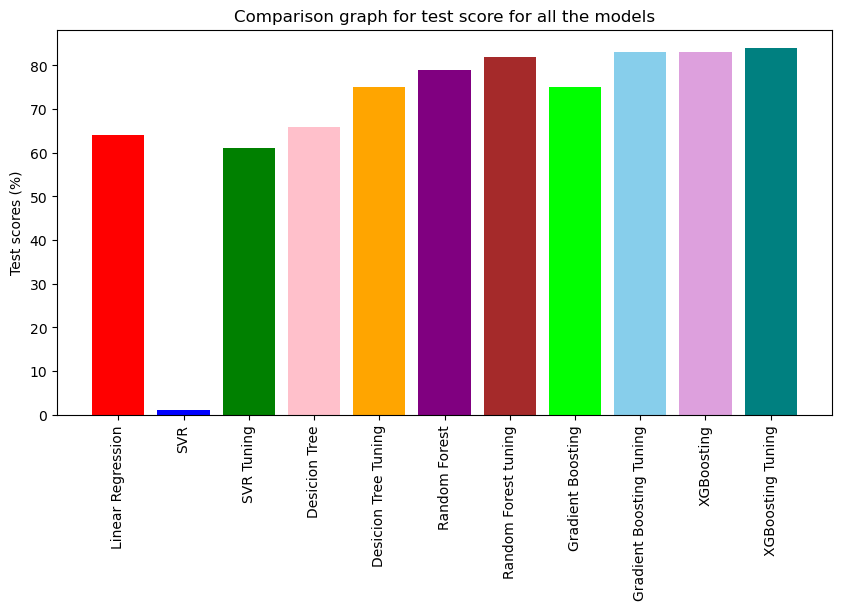

In [293]:
test_score_percentage= result['Test R-squared'] * 100
plt.figure(figsize=(10,5))
plt.title('Comparison graph for test score for all the models')
plt.bar(result['Algorithm'],test_score_percentage,color=['red','blue','green','pink','orange','purple','brown','lime','skyblue','plum','teal'])
plt.ylabel('Test scores (%)')
plt.xticks(rotation=90)
plt.show()